In [1]:
library(pastecs)
library(ggplot2)
library(ggpubr)
library(Hmisc)
library(ggpubr)
library(corrplot)
library(plyr)
library(multcomp)
library(afex)
library(tidyr)
library(ggsignif)
library(ltm)
# library(tidyverse)
library(rms)
library(wesanderson) # color package
library(psych) #EFA
library(lavaan)
library(semPlot)
library(semTools)
library(dplyr)
library(knitr)
library(MVN)
library(lavaanPlot)
library ( semTable )
# library(corrgram)
# library(tidyverse)
library(ggpubr)
library(rstatix)
library(broom)
library(multcomp)
library(xtable)  
library(pandoc)
library(knitr)
par(bg = "#f7f7f7")

Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: 'Hmisc'


The following objects are masked from 'package:base':

    format.pval, units


corrplot 0.92 loaded


Attaching package: 'plyr'


The following objects are masked from 'package:Hmisc':

    is.discrete, summarize


The following object is masked from 'package:ggpubr':

    mutate


Loading required package: mvtnorm

Loading required package: TH.data

Loading required package: MASS


Attaching package: 'TH.data'


The following object is masked from 'package:MASS':

    geyser


Loading required package: lme4

Loading required package: Matrix

************
Welcome to afex. For support visit: http://afex.singmann.science/

- Functions for ANOVAs: aov_car(), aov_ez(), and aov_4()
- Methods for calculating p-values with mixed(): 'S', 'KR', 'LRT', and 'PB'
- 'afex_aov' and 'mixed' objects can be passed to emmeans() for follow-up tests
- NEWS: emmeans() for

In [2]:
## read  csv
cds_df = read.csv('./cnd_csv/allCondition.csv')
llm_df = read.csv('./cnd_csv/llm_data.csv')
label_df = read.csv('./cnd_csv/labels_data.csv')

In [3]:
table(cds_df$condition)


Explanation    Hashtags       Label     noLabel 
         60          60          60          60 

In [4]:
cds_df$condition[cds_df$condition == "Label"] <- "MTL label"
names(cds_df)[names(cds_df) == "healthiness"] <- "Healthiness"

cds_df$Healthiness[cds_df$Healthiness == "unhealthy"] <- "less healthy"
table(cds_df$condition)


Explanation    Hashtags   MTL label     noLabel 
         60          60          60          60 

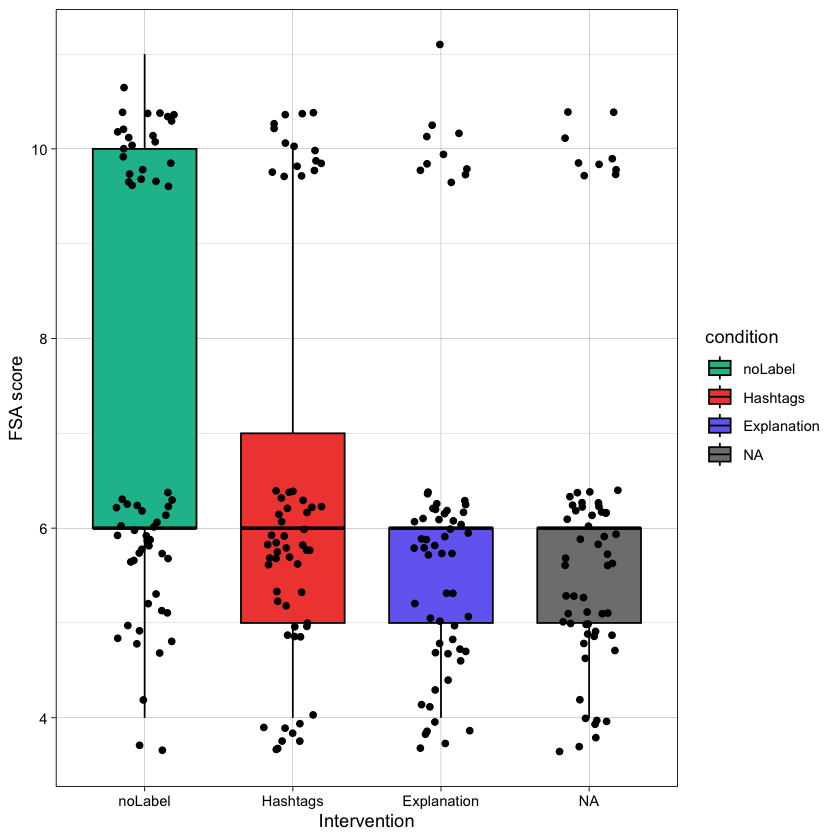

In [5]:
ggboxplot(cds_df, x = "condition", y = "fsa_score", fill = "condition",
           palette = c("#1ABC9C","#F14B3F", "#756DF2", "#419af4" ),
          order = c("noLabel", "MTL", "Hashtags", "Explanation"),
          ylab = "FSA score", xlab = "Intervention", add = "jitter") + theme_linedraw()  
ggsave("./fig/fsalabels_all.pdf",  width=8, height=5,dpi=700)

In [6]:
table(cds_df$condition)


Explanation    Hashtags   MTL label     noLabel 
         60          60          60          60 

In [7]:
# Group by condition and calculate summary statistics
cds_df$condition[cds_df$condition == ' MTL label'] <- "MTL Label"
cds_df$condition[cds_df$condition == 'Explanation'] <- "LLM Explanation"
cds_df$condition[cds_df$condition == 'Hashtags'] <- "LLM Hashtag"


In [8]:
cds_df$condition[cds_df$condition == 'MTL label'] <- "MTL Label"

In [9]:
table(cds_df$condition)
 legend.position = "top",  # Place the main legend on top
    legend.box = "vertical",  # Stack the legend vertically
    legend.box.spacing = unit(1, "cm"),
       legend.key.size = unit(1, "cm"),    # Add space between legend boxes
  ) +
  guides(
    color = guide_legend(nrow = 2)  # Specify the number of rows in the legend
  ) +

ERROR: Error in parse(text = x, srcfile = src): <text>:2:25: unexpected ','
1: table(cds_df$condition)
2:  legend.position = "top",
                           ^


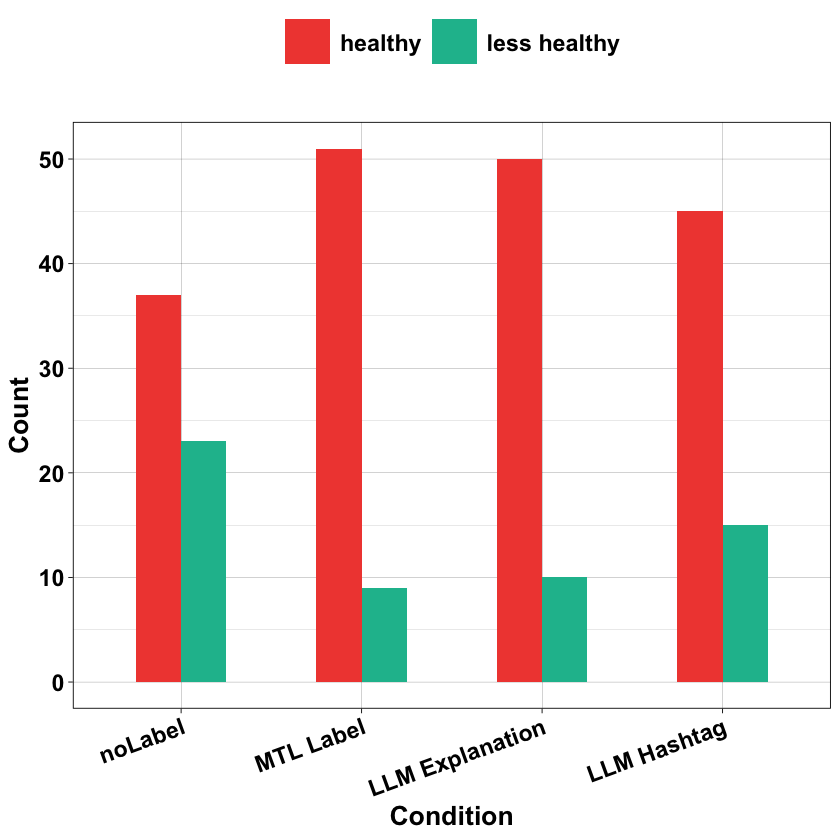

In [357]:
cds_df$condition <- factor(cds_df$condition, levels =  c("noLabel", "MTL Label", "LLM Explanation", "LLM Hashtag"))
choice_dist_polot  = ggplot(data = cds_df, aes(x=condition, group = Healthiness, fill=Healthiness), ) + geom_bar(width=0.5,position = position_dodge(width=0.5)) + labs(x="Condition", y='Count') + scale_fill_manual(values = c( "#F14B3F","#1ABC9C"))+theme_linedraw() +  theme(
axis.text.x = element_text(face = "bold", size = 14),  # Bold and larger x-axis values
    axis.text.y = element_text(face = "bold", size = 14),  # Bold and larger y-axis values
    axis.title.x = element_text(face = "bold", size = 16),  # Bold and larger x-axis title
    axis.title.y = element_text(face = "bold", size = 16),  # Bold and larger y-axis title
    legend.text = element_text(face = "bold", size = 14),  
    legend.title=element_blank(), # Bold and larger legend text
    # legend.title = element_text(face = "bold", size = 16),
     legend.position = "top",  # Place the main legend on top
    legend.box = "vertical",  # Stack the legend vertically
    legend.box.spacing = unit(1, "cm"),
       legend.key.size = unit(1, "cm"), 
  )  +   theme(
    axis.text.x = element_text(angle = 20, vjust = 1, hjust = 1),
    axis.text = element_text(face = "bold")
  ) 

choice_dist_polot
ggsave("./fig/condition_dist.pdf",  width=6, height=6,dpi=1000)

In [353]:
# Compute mean and std for each group
mean_by_group <- tapply(cds_df$fsa_score, cds_df$condition, mean)
std_by_group <- tapply(cds_df$fsa_score, cds_df$condition, sd)


# Print results
print(mean_by_group)
# print(std_by_group)

        noLabel       MTL Label LLM Explanation     LLM Hashtag 
       7.283333        6.033333        6.116667        6.533333 


In [13]:
table(cds_df$condition, cds_df$Healthiness)

                 
                  healthy less healthy
  LLM Explanation      50           10
  LLM Hashtag          45           15
  MTL Label            51            9
  noLabel              37           23

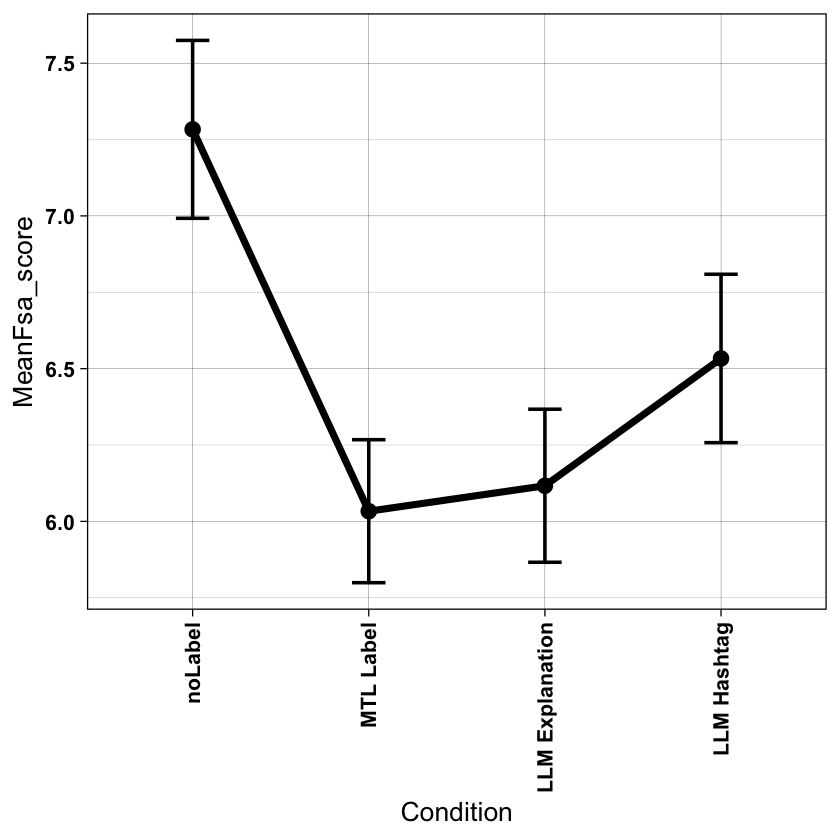

In [34]:
## group by choice
# Group by condition and calculate summary statistics
summary_data <- cds_df %>%
  group_by(condition) %>%
  summarise(
    mean_fsa_scre = mean(fsa_score, na.rm = TRUE),
    se_fsa_scre = sd(fsa_score, na.rm = TRUE) / sqrt(n())
  )

# Ensure condition is an ordered factor
summary_data$condition <- ordered(summary_data$condition, levels = c("noLabel", "MTL Label", "LLM Explanation", "LLM Hashtag"))

# Plot with error bars
ggplot(summary_data, aes(x = condition, y = mean_fsa_scre, group=1)) +
  geom_line(size = 2) +
  geom_errorbar(aes(
    ymin = mean_fsa_scre - se_fsa_scre,
    ymax = mean_fsa_scre + se_fsa_scre
  ), size = 1, width = 0.19) +
  geom_point(size = 2, stroke = 2) +
  theme_linedraw(base_size = 16) +
  theme(
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1),
    axis.text = element_text(face = "bold")
  ) +
  labs(x = "Condition", y = "MeanFsa_score") 
  ggsave("./fig/distribution_fsa_scre_SE.pdf",width=6, height=4,dpi=700)

### ANOVA across all

In [35]:
## compute the mean difference across condition
Fsa_mean.model <- fsa_score ~ condition 
Fsa_mean.fit <- lm(Fsa_mean.model, data = cds_df)
summary <- summary(Fsa_mean.fit)
summary


Call:
lm(formula = Fsa_mean.model, data = cds_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2833 -1.2833 -0.5333 -0.0333  4.8833 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)                7.2833     0.2638  27.612  < 2e-16 ***
conditionMTL Label        -1.2500     0.3730  -3.351 0.000938 ***
conditionLLM Explanation  -1.1667     0.3730  -3.127 0.001985 ** 
conditionLLM Hashtag      -0.7500     0.3730  -2.011 0.045514 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.043 on 236 degrees of freedom
Multiple R-squared:  0.05627,	Adjusted R-squared:  0.04428 
F-statistic: 4.691 on 3 and 236 DF,  p-value: 0.003346


In [36]:
## introducing Dummies variables
# Create dummy variables for the 'condition' variable
df_dummies  = cds_df

# Create dummy variables for the 'Color' column
dummies <- model.matrix(~ condition - 1, data = df_dummies)

# Combine the dummy variables with the original dataset (optional)
df_dummies <- cbind(df_dummies, dummies)

#### Fsa with dummies

In [37]:
Fsa_mean_dummies.model <- fsa_score ~ conditionHashtags+conditionExplanation +conditionLabel+conditionnoLabel
Fsa_mean.fit <- lm(Fsa_mean_dummies.model, data = df_dummies)
summary <- summary(Fsa_mean.fit)
print(summary)

ERROR: Error in eval(predvars, data, env): object 'conditionHashtags' not found


In [33]:
## Anova test 
anova_FSA= aov(Fsa_mean_dummies.model, data= df_dummies)
summary(anova_FSA)

ERROR: Error in eval(predvars, data, env): object 'conditionHashtags' not found


In [35]:
## Anova test 
anova_FSA= aov(fsa_score  ~ condition, data= df_dummies)
summary(anova_FSA)

             Df Sum Sq Mean Sq F value  Pr(>F)   
condition     3   58.7  19.583   4.691 0.00335 **
Residuals   236  985.2   4.175                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [36]:
Labels_fsa_posthoc <- TukeyHSD(anova_FSA,  conf.level = 0.95)
Labels_fsa_posthoc

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = fsa_score ~ condition, data = df_dummies)

$condition
                            diff        lwr        upr     p adj
MTL-noLabel          -1.25000000 -2.2152091 -0.2847909 0.0051574
Explanation-noLabel  -1.16666667 -2.1318757 -0.2014576 0.0106276
Hashtags-noLabel     -0.75000000 -1.7152091  0.2152091 0.1869986
Explanation-MTL       0.08333333 -0.8818757  1.0485424 0.9960585
Hashtags-MTL          0.50000000 -0.4652091  1.4652091 0.5381917
Hashtags-Explanation  0.41666667 -0.5485424  1.3818757 0.6794491


In [37]:
fsa_posthocDF = as.data.frame(Labels_fsa_posthoc$condition)
fsa_posthocDF$pair = rownames(fsa_posthocDF)
# rec= as.data.frame(CD_posthoc$PE)
# all = rbind(CD_posthocDF,rec)
# all$pair = rownames(all)

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."
Saving 7 x 7 in image


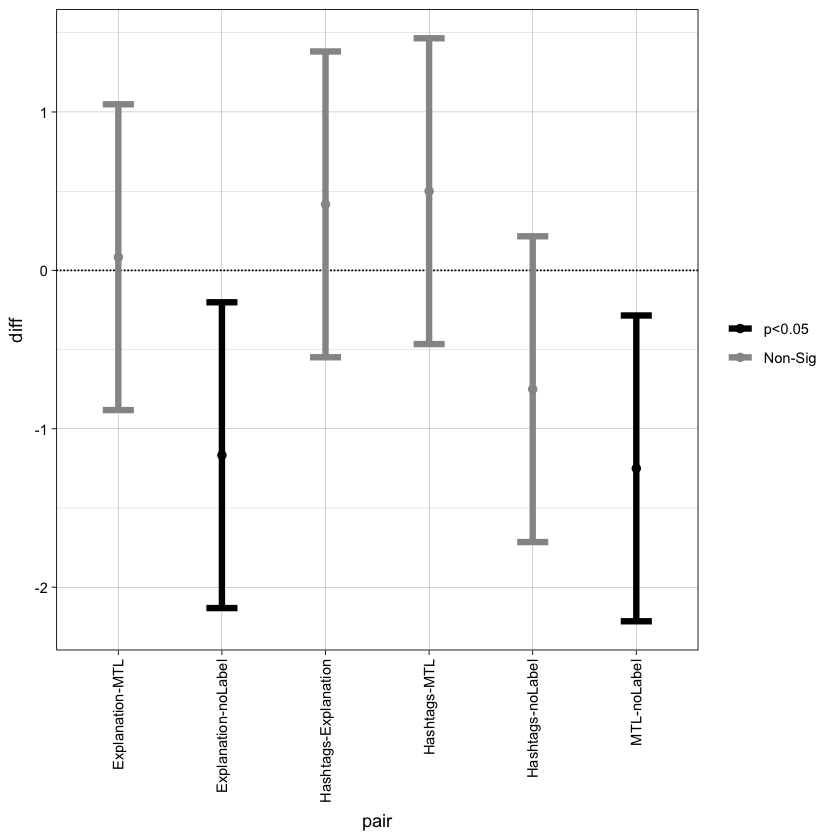

In [38]:

ggplot(fsa_posthocDF, aes( colour=cut(`p adj`, c(0, 0.03, 0.05, 1), 
                           label=c("p<0.05","p<0.05","Non-Sig")))) +
  geom_hline(yintercept=0, lty="11", colour="black") +
  geom_errorbar(aes(pair, ymin=lwr, ymax=upr), width=0.3, size=1.8) +
  geom_point(aes(pair, diff), size=2) +
  labs(colour="") +theme_linedraw()+theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +  scale_color_manual(values = c("black", "grey59"))
  ggsave("./fig/CD_HSD.pdf", dpi=300)

### ANOVA Across labels

In [39]:

# Create dummy variables for the 'Color' column
dummies <- model.matrix(~ condition - 1, data = label_df)

# Combine the dummy variables with the original dataset (optional)
label_dummies <- cbind(label_df, dummies)

In [40]:
Fsa_labe_dummies.model <- fsa_score ~ conditionLabel+ conditionnoLabel 
Fsa_mean.fit <- lm(Fsa_labe_dummies.model, data = label_dummies)
summary <- summary(Fsa_mean.fit)
print(summary)


Call:
lm(formula = Fsa_labe_dummies.model, data = label_dummies)

Residuals:
   Min     1Q Median     3Q    Max 
-3.283 -1.283 -1.033  2.717  3.967 

Coefficients: (1 not defined because of singularities)
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        7.2833     0.2642  27.570   <2e-16 ***
conditionLabel    -1.2500     0.3736  -3.346   0.0011 ** 
conditionnoLabel       NA         NA      NA       NA    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.046 on 118 degrees of freedom
Multiple R-squared:  0.08665,	Adjusted R-squared:  0.07891 
F-statistic: 11.19 on 1 and 118 DF,  p-value: 0.001101



In [41]:
## Anova test 
anova_label_FSA= aov(Fsa_labe_dummies.model, data = label_dummies)
summary(anova_label_FSA)

                Df Sum Sq Mean Sq F value Pr(>F)   
conditionLabel   1   46.9   46.88   11.19 0.0011 **
Residuals      118  494.1    4.19                  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

### ANOVA Across llms

In [42]:


# Create dummy variables for the 'Color' column
dummies <- model.matrix(~ condition - 1, data = llm_df)

# Combine the dummy variables with the original dataset (optional)
llm_dummies <- cbind(llm_df, dummies)

In [43]:
Fsa_llm_dummies.model <- fsa_score ~ conditionExplanation+conditionHashtags
Fsa_mean.fit <- lm(Fsa_llm_dummies.model, data = llm_dummies)
summary <- summary(Fsa_mean.fit)
print(summary)


Call:
lm(formula = Fsa_llm_dummies.model, data = llm_dummies)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5333 -1.1167 -0.5333 -0.1167  4.8833 

Coefficients: (1 not defined because of singularities)
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)            6.5333     0.2634  24.806   <2e-16 ***
conditionExplanation  -0.4167     0.3725  -1.119    0.266    
conditionHashtags          NA         NA      NA       NA    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.04 on 118 degrees of freedom
Multiple R-squared:  0.01049,	Adjusted R-squared:  0.002108 
F-statistic: 1.251 on 1 and 118 DF,  p-value: 0.2656



In [44]:
## Anova test 
anova_label_FSA= aov(Fsa_llm_dummies.model, data = llm_dummies)
summary(anova_label_FSA)

                      Df Sum Sq Mean Sq F value Pr(>F)
conditionExplanation   1    5.2   5.208   1.251  0.266
Residuals            118  491.1   4.162               

## Confirmatory Factor Analysis

In [218]:
cfa_df = read.csv('./cnd_csv/cfa_DF.csv')

### Food Knowledge



In [ ]:
SFD.model <- 'SubjectiveFoodKnowledge =~ FK_9 + FK_11 + FK_12' 
SFD.fit <- cfa(SFD.model, data = cfa_df, mimic=c('Mplus'), std.lv = TRUE, ordered = TRUE)
print(summary(SFD.fit, fit.measures = T, standardized=T, rsq=TRUE))

lavaan 0.6.13 ended normally after 1 iteration

  Estimator                                       DWLS
  Optimization method                           NLMINB
  Number of model parameters                        15

  Number of observations                           240

Model Test User Model:
                                              Standard      Scaled
  Test Statistic                                 0.000       0.000
  Degrees of freedom                                 0           0

Model Test Baseline Model:

  Test statistic                               916.038     847.555
  Degrees of freedom                                 3           3
  P-value                                        0.000       0.000
  Scaling correction factor                                  1.081

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    1.000       1.000
  Tucker-Lewis Index (TLI)                       1.000       1.000
                                       

In [ ]:
parameterEstimates(SFD.fit, standardized=TRUE) %>%
filter(op == "=~") %>%
select('Latent Factor'=lhs, Indicator=rhs, B=est, SE=se, Z=z, 'p-value'=pvalue, Beta=std.all) %>%
knitr::kable(digits = 3, booktabs=TRUE, format="markdown", caption="Factor Loadings")



Table: Factor Loadings

|Latent Factor           |Indicator |     B|    SE|      Z| p-value|  Beta|
|:-----------------------|:---------|-----:|-----:|------:|-------:|-----:|
|SubjectiveFoodKnowledge |FK_9      | 0.796| 0.034| 23.670|       0| 0.796|
|SubjectiveFoodKnowledge |FK_11     | 0.828| 0.039| 21.371|       0| 0.828|
|SubjectiveFoodKnowledge |FK_12     | 0.792| 0.038| 21.054|       0| 0.792|

pdf 
  2

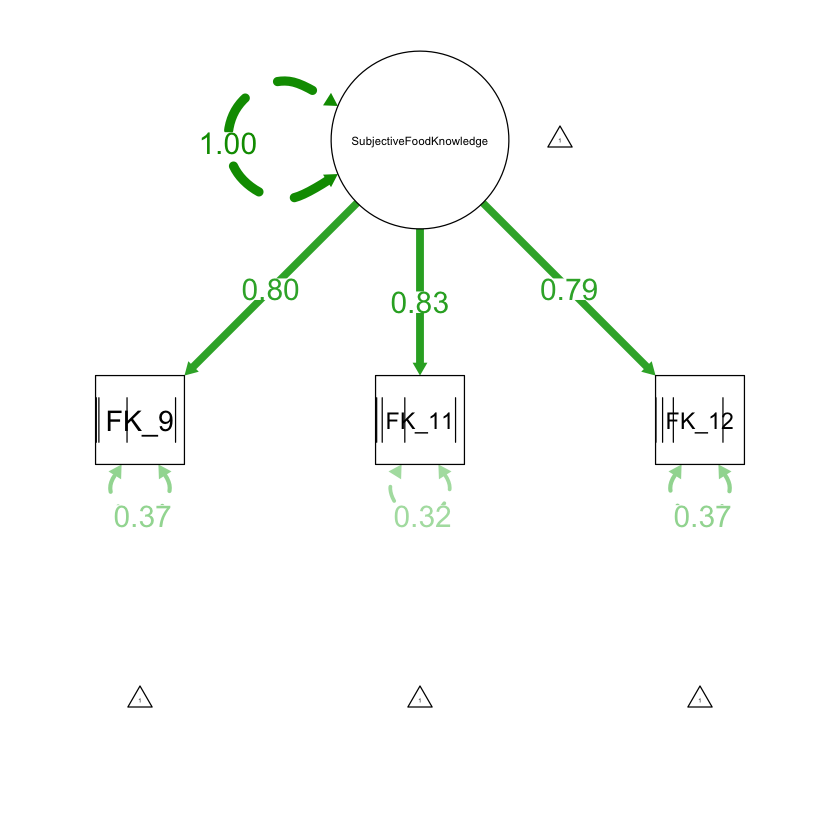

In [ ]:
semPaths(SFD.fit, what = "std", residuals = TRUE, nCharNodes = 0, 
 sizeMan = 10, sizeLat = 20,
   edge.label.cex = 1.5, legend = FALSE)
# ggsave("./Fig/CFA_KB.png", dpi=300)
dev.print(pdf, './fig/sfd_fca.pdf')

In [ ]:
### Cronbach Alpha
SFD = cfa_df[, c('FK_9','FK_10','FK_11','FK_12')]
sfd_alpha=cronbach.alpha(SFD)
sfd_alpha


Cronbach's alpha for the 'SFD' data-set

Items: 4
Sample units: 240
alpha: 0.812


In [ ]:
# Calculate average inter-item correlation
avg_r <- sfd_alpha$alpha * (1 + (4 - 1)) / (4 - 1)

# Approximate AVE
ave <- (sfd_alpha$alpha * avg_r) / (sfd_alpha$alpha * avg_r + (1 - sfd_alpha$alpha))
ave

[1] 0.8241826

In [ ]:
# AVE(SFD.fit, obs.var = FALSE)
reliability(SFD.fit)

For constructs with categorical indicators, Zumbo et al.`s (2007) "ordinal alpha" is calculated in addition to the standard alpha, which treats ordinal variables as numeric. See Chalmers (2018) for a critique of "alpha.ord" and the response by Zumbo & Kroc (2019). Likewise, average variance extracted is calculated from polychoric (polyserial) not Pearson correlations.




,SubjectiveFoodKnowledge
alpha,0.7764396
alpha.ord,0.8466050
omega,0.7813392
omega2,0.7813392
omega3,0.7813392
avevar,0.6482385


### Sustainabilty


In [52]:
SUS.model <- 'SustainabilityKnowledge =~ sus_1 + sus_3' 
SUS.fit <- cfa(SUS.model, data = cfa_df)
print(summary(SUS.fit, fit.measures = TRUE, standardized=TRUE))

Warning message in lav_model_vcov(lavmodel = lavmodel, lavsamplestats = lavsamplestats, :
"lavaan WARNING:
    Could not compute standard errors! The information matrix could
    not be inverted. This may be a symptom that the model is not
    identified."


lavaan 0.6.13 ended normally after 11 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                         4

  Number of observations                           240

Model Test User Model:
                                                      
  Test statistic                                    NA
  Degrees of freedom                                -1
  P-value (Unknown)                                 NA

Model Test Baseline Model:

  Test statistic                                    NA
  Degrees of freedom                                NA
  P-value                                           NA

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                       NA
  Tucker-Lewis Index (TLI)                          NA

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)               -577.707
  Loglikelihood unrestricted model (H1)       -5

In [ ]:
parameterEstimates(SUS.fit, standardized=TRUE) %>%
filter(op == "=~") %>%
select('Latent Factor'=lhs, Indicator=rhs, B=est, SE=se, Z=z, 'p-value'=pvalue, Beta=std.all) %>%
knitr::kable(digits = 3, booktabs=TRUE, format="markdown", caption="Factor Loadings")



Table: Factor Loadings

|Latent Factor           |Indicator |     B| SE|  Z| p-value|  Beta|
|:-----------------------|:---------|-----:|--:|--:|-------:|-----:|
|SustainabilityKnowledge |sus_1     | 1.000|  0| NA|      NA| 0.871|
|SustainabilityKnowledge |sus_3     | 0.562| NA| NA|      NA| 0.475|

pdf 
  2

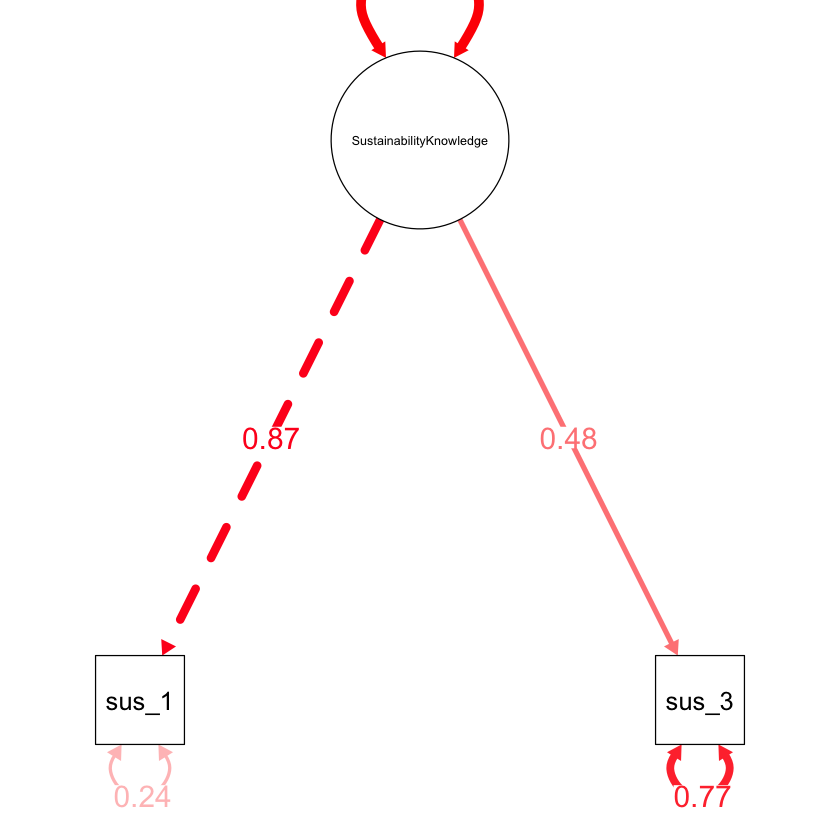

In [ ]:
semPaths(SUS.fit, what = "std", residuals = TRUE, nCharNodes = 0, 
 sizeMan = 10, sizeLat = 20,
   edge.label.cex = 1.5, legend = FALSE,posCol = c("red"))
# ggsave("./Fig/CFA_KB.png", dpi=300)
dev.print(pdf, './fig/SUS_fca.pdf')

In [ ]:
### Cronbach Alpha
SUS = cfa_df[, c('sus_1','sus_3')]
sus_alpha=cronbach.alpha(SUS)
sus_alpha


Cronbach's alpha for the 'SUS' data-set

Items: 2
Sample units: 240
alpha: 0.585


In [ ]:
AVE(SUS.fit, obs.var = FALSE)

SustainabilityKnowledge 
                  0.485

### Choice Satisfaction

In [ ]:
ch_satis.model <- 'ChoiceSatisfaction =~ liked_recipes+prepare_recipes+fit_preference' 
ch_satis.model.fit <- cfa(ch_satis.model, data = cfa_df, mimic=c('Mplus'), std.lv = TRUE, ordered = TRUE)
print(summary(ch_satis.model.fit, fit.measures = T, standardized=T, rsq=TRUE))

lavaan 0.6.13 ended normally after 1 iteration

  Estimator                                       DWLS
  Optimization method                           NLMINB
  Number of model parameters                        15

  Number of observations                           240

Model Test User Model:
                                              Standard      Scaled
  Test Statistic                                 0.000       0.000
  Degrees of freedom                                 0           0

Model Test Baseline Model:

  Test statistic                              1367.651    1183.823
  Degrees of freedom                                 3           3
  P-value                                        0.000       0.000
  Scaling correction factor                                  1.156

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    1.000       1.000
  Tucker-Lewis Index (TLI)                       1.000       1.000
                                       

In [ ]:
parameterEstimates(ch_satis.model.fit , standardized=TRUE) %>%
filter(op == "=~") %>%
select('Latent Factor'=lhs, Indicator=rhs, B=est, SE=se, Z=z, 'p-value'=pvalue, Beta=std.all) %>%
knitr::kable(digits = 3, booktabs=TRUE, format="markdown", caption="Factor Loadings")



Table: Factor Loadings

|Latent Factor      |Indicator       |     B|    SE|      Z| p-value|  Beta|
|:------------------|:---------------|-----:|-----:|------:|-------:|-----:|
|ChoiceSatisfaction |liked_recipes   | 0.899| 0.029| 31.012|       0| 0.899|
|ChoiceSatisfaction |prepare_recipes | 0.854| 0.031| 27.929|       0| 0.854|
|ChoiceSatisfaction |fit_preference  | 0.815| 0.034| 24.289|       0| 0.815|

pdf 
  2

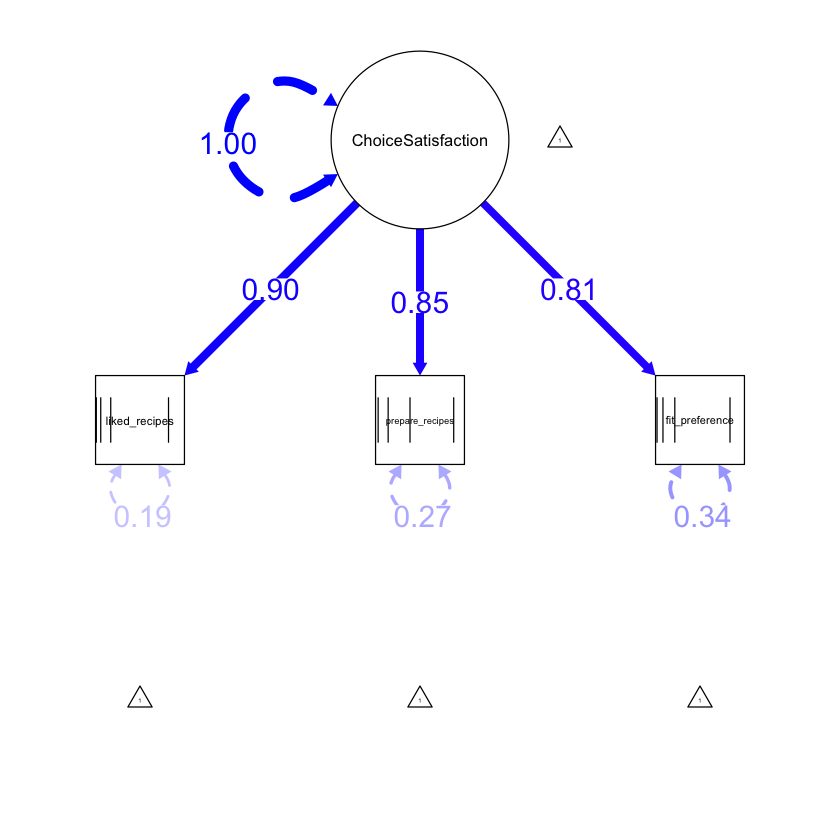

In [ ]:
semPaths(ch_satis.model.fit, what = "std", residuals = TRUE, nCharNodes = 0, 
 sizeMan = 10, sizeLat = 20,
   edge.label.cex = 1.5, legend = FALSE,posCol = c("blue"))
# ggsave("./Fig/CFA_KB.png", dpi=300)
dev.print(pdf, './fig/ch_sat.pdf')

In [ ]:
### Cronbach Alpha
choi_sats = cfa_df[, c('liked_recipes','prepare_recipes','fit_preference','recommend_recipe')]
choi_sats=cronbach.alpha(choi_sats)
choi_sats


Cronbach's alpha for the 'choi_sats' data-set

Items: 4
Sample units: 240
alpha: 0.854


In [ ]:
# AVE(SFD.fit, obs.var = FALSE)
reliability(ch_satis.model.fit)

For constructs with categorical indicators, Zumbo et al.`s (2007) "ordinal alpha" is calculated in addition to the standard alpha, which treats ordinal variables as numeric. See Chalmers (2018) for a critique of "alpha.ord" and the response by Zumbo & Kroc (2019). Likewise, average variance extracted is calculated from polychoric (polyserial) not Pearson correlations.




,ChoiceSatisfaction
alpha,0.8441916
alpha.ord,0.8914035
omega,0.8312788
omega2,0.8312788
omega3,0.8312788
avevar,0.7341359


### Choice difficulty

In [283]:
ch_diff.model <- 'ChoiceDifficulty =~  many_to_choose+choice_overwhelming' 
ch_diff.model.fit <- cfa(ch_diff.model, data = cfa_df, mimic=c('Mplus'), std.lv = TRUE, ordered = TRUE)
print(summary(ch_diff.model.fit, fit.measures = T, standardized=T))

Warning message in lav_model_vcov(lavmodel = lavmodel, lavsamplestats = lavsamplestats, :
"lavaan WARNING:
    Could not compute standard errors! The information matrix could
    not be inverted. This may be a symptom that the model is not
    identified."


lavaan 0.6.13 ended normally after 1 iteration

  Estimator                                       DWLS
  Optimization method                           NLMINB
  Number of model parameters                        10

  Number of observations                           240

Model Test User Model:
                                                      
  Test statistic                                    NA
  Degrees of freedom                                -1
  P-value (Unknown)                                 NA

Standardized Root Mean Square Residual:

  SRMR                                           0.000

Parameter Estimates:

  Standard errors                           Robust.sem
  Information                                 Expected
  Information saturated (h1) model        Unstructured

Latent Variables:
                      Estimate  Std.Err  z-value  P(>|z|)   Std.lv  Std.all
  ChoiceDifficulty =~                                                      
    many_to_choose       1.000 

In [284]:
parameterEstimates(ch_diff.model.fit , standardized=TRUE) %>%
filter(op == "=~") %>%
select('Latent Factor'=lhs, Indicator=rhs, B=est, SE=se, Z=z, 'p-value'=pvalue, Beta=std.all) %>%
knitr::kable(digits = 3, booktabs=TRUE, format="markdown", caption="Factor Loadings")



Table: Factor Loadings

|Latent Factor    |Indicator           |     B| SE|  Z| p-value|  Beta|
|:----------------|:-------------------|-----:|--:|--:|-------:|-----:|
|ChoiceDifficulty |many_to_choose      | 1.000| NA| NA|      NA| 1.000|
|ChoiceDifficulty |choice_overwhelming | 0.413| NA| NA|      NA| 0.413|

pdf 
  2

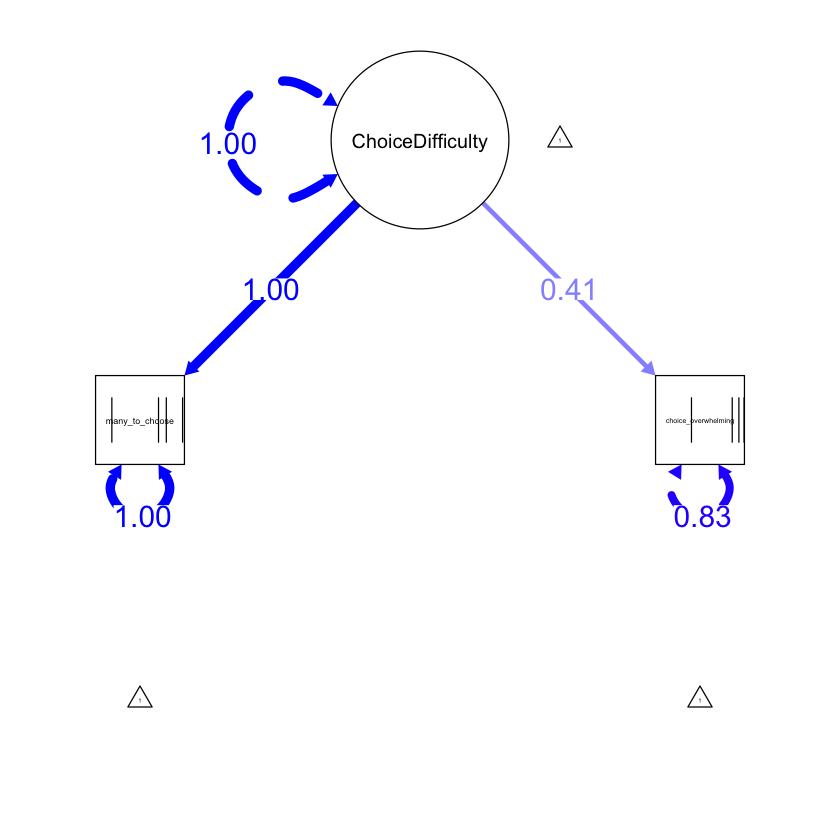

In [285]:
semPaths(ch_diff.model.fit, what = "std", residuals = TRUE, nCharNodes = 0, 
 sizeMan = 10, sizeLat = 20,
   edge.label.cex = 1.5, legend = FALSE,posCol = c("blue"))
# ggsave("./Fig/CFA_KB.png", dpi=300)
dev.print(pdf, './fig/ch_diff.pdf')

In [ ]:
### Cronbach Alpha  
choi_diff = cfa_df[, c('many_to_choose','easy_choice','choice_overwhelming')]
choi_diff=cronbach.alpha(choi_diff)
choi_diff


Cronbach's alpha for the 'choi_diff' data-set

Items: 3
Sample units: 240
alpha: 0.728


In [ ]:
AVE(ch_diff.model.fit, obs.var = FALSE)

ChoiceDifficulty 
           0.571

### Perceived Effort

In [ ]:
perc_effort.model <- 'PerceivedEffort =~ unders_sys +sys_time' 
perc_effort.model.fit <- cfa(perc_effort.model, data = cfa_df, mimic=c('Mplus'), std.lv = TRUE, ordered = TRUE)
print(summary(perc_effort.model.fit, fit.measures = T, standardized=T))

ERROR: Error in lavaan::lavaan(model = perc_effort.model, data = cfa_df, ordered = TRUE, : object 'cfa_df' not found


In [ ]:
parameterEstimates(perc_effort.model.fit , standardized=TRUE) %>%
filter(op == "=~") %>%
select('Latent Factor'=lhs, Indicator=rhs, B=est, SE=se, Z=z, 'p-value'=pvalue, Beta=std.all) %>%
knitr::kable(digits = 3, booktabs=TRUE, format="markdown", caption="Factor Loadings")

ERROR: Error in parameterEstimates(perc_effort.model.fit, standardized = TRUE): object 'perc_effort.model.fit' not found


In [ ]:
semPaths(perc_effort.model.fit, what = "std", residuals = TRUE, nCharNodes = 0, 
 sizeMan = 10, sizeLat = 20,
   edge.label.cex = 1.5, legend = FALSE,posCol = c("blue"))
# ggsave("./Fig/CFA_KB.png", dpi=300)
dev.print(pdf, './fig/perc_effort.pdf')

ERROR: Error in "semPlotModel" %in% class(object): object 'perc_effort.model.fit' not found


In [15]:
### Cronbach Alpha  
per_Efor_alph = cfa_df[, c('sys_time','unders_sys','many_actions')]
per_Efor_alph=cronbach.alpha(per_Efor_alph)
per_Efor_alph

ERROR: Error in eval(expr, envir, enclos): object 'cfa_df' not found


In [16]:
AVE(perc_effort.model.fit, obs.var = FALSE)

ERROR: Error in lavInspect(object, "ngroups"): object 'perc_effort.model.fit' not found


### Understandability

In [105]:
understand.model <- 'Understand =~ under_2+under_3' 
understand.model.fit <- cfa(understand.model, data = cfa_df, mimic=c('Mplus'), std.lv = TRUE, ordered = TRUE)
print(summary(understand.model.fit, fit.measures = T, standardized=T, rsq=TRUE))

Warning message in lav_model_vcov(lavmodel = lavmodel, lavsamplestats = lavsamplestats, :
"lavaan WARNING:
    Could not compute standard errors! The information matrix could
    not be inverted. This may be a symptom that the model is not
    identified."


lavaan 0.6.13 ended normally after 1 iteration

  Estimator                                       DWLS
  Optimization method                           NLMINB
  Number of model parameters                        10

  Number of observations                           240

Model Test User Model:
                                                      
  Test statistic                                    NA
  Degrees of freedom                                -1
  P-value (Unknown)                                 NA

Standardized Root Mean Square Residual:

  SRMR                                           0.000

Parameter Estimates:

  Standard errors                           Robust.sem
  Information                                 Expected
  Information saturated (h1) model        Unstructured

Latent Variables:
                   Estimate  Std.Err  z-value  P(>|z|)   Std.lv  Std.all
  Understand =~                                                         
    under_2           1.000       NA 

In [ ]:
parameterEstimates(understand.model.fit  , standardized=TRUE) %>%
filter(op == "=~") %>%
select('Latent Factor'=lhs, Indicator=rhs, B=est, SE=se, Z=z, 'p-value'=pvalue, Beta=std.all) %>%
knitr::kable(digits = 3, booktabs=TRUE, format="markdown", caption="Factor Loadings")



Table: Factor Loadings

|Latent Factor |Indicator |     B|    SE|      Z| p-value|  Beta|
|:-------------|:---------|-----:|-----:|------:|-------:|-----:|
|Understand    |under_1   | 0.730| 0.040| 18.420|       0| 0.730|
|Understand    |under_2   | 0.702| 0.051| 13.760|       0| 0.702|
|Understand    |under_3   | 0.825| 0.039| 21.025|       0| 0.825|

pdf 
  2

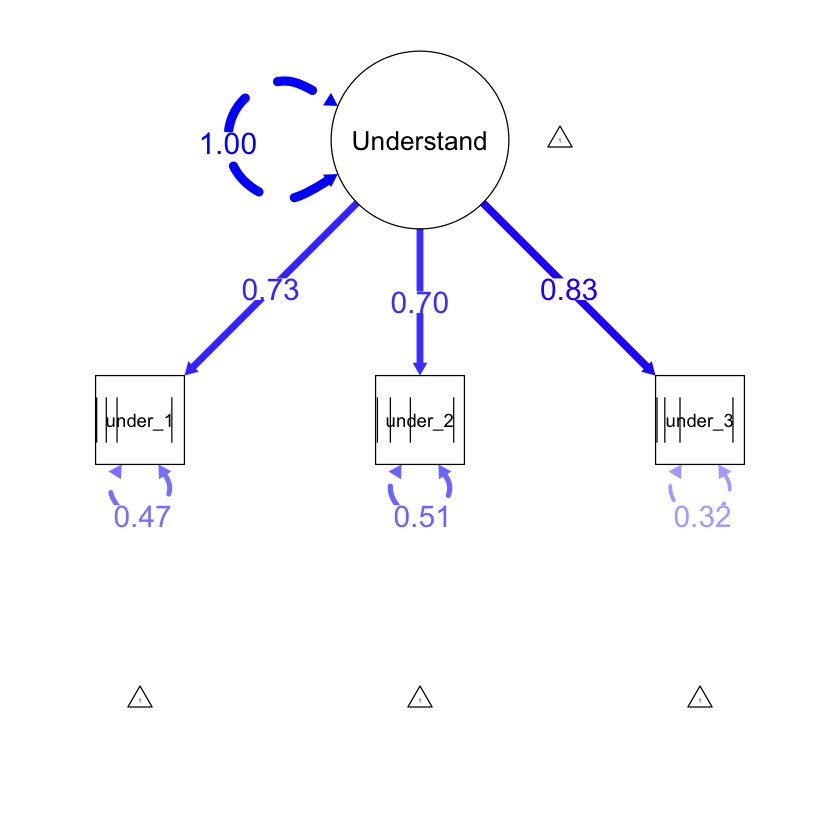

In [94]:
semPaths(understand.model.fit , what = "std", residuals = TRUE, nCharNodes = 0, 
 sizeMan = 10, sizeLat = 20,
   edge.label.cex = 1.5, legend = FALSE,posCol = c("blue"))
# ggsave("./Fig/CFA_KB.png", dpi=300)
dev.print(pdf, './fig/understandability.pdf')

In [117]:
### Cronbach Alpha  
# calculate cronbach's alpha

understand_alph = cfa_df[, c( 'under_2','under_3', 'under_1')]
understand_alph=cronbach.alpha(understand_alph, CI=TRUE, standardized=TRUE)
understand_alph


Standardized Cronbach's alpha for the 'understand_alph' data-set

Items: 3
Sample units: 240
alpha: 0.72

Bootstrap 95% CI based on 1000 samples
 2.5% 97.5% 
0.637 0.785 



In [110]:
# AVE(SFD.fit, obs.var = FALSE)
reliability(ch_satis.model.fit)

For constructs with categorical indicators, Zumbo et al.`s (2007) "ordinal alpha" is calculated in addition to the standard alpha, which treats ordinal variables as numeric. See Chalmers (2018) for a critique of "alpha.ord" and the response by Zumbo & Kroc (2019). Likewise, average variance extracted is calculated from polychoric (polyserial) not Pearson correlations.




,ChoiceSatisfaction
alpha,0.8441916
alpha.ord,0.8914035
omega,0.8312788
omega2,0.8312788
omega3,0.8312788
avevar,0.7341359


### Usability

In [223]:
nudge_df = read.csv('./cnd_csv/nudge_df.csv')

In [224]:
names(nudge_df)

[1] "X"                   "person"              "age"                
 [4] "country"             "education"           "gender"             
 [7] "FK_9"                "FK_10"               "FK_11"              
[10] "FK_12"               "sus_1"               "sus_2"              
[13] "sus_3"               "sus_4"               "session_id"         
[16] "Height"              "Weight"              "RecipeWebUsage"     
[19] "HomeCook"            "CookingExp"          "EatingGoals"        
[22] "Depression"          "PhysicalActivity"    "SleepHours"         
[25] "CookingTime"         "recipe_id"           "recipe_name"        
[28] "Nutri_score"         "fsa_score"           "healthiness"        
[31] "liked_recipes"       "prepare_recipes"     "fit_preference"     
[34] "know_many"           "recommend_recipe"    "many_to_choose"     
[37] "easy_choice"         "choice_overwhelming" "sys_time"           
[40] "unders_sys"          "many_actions"        "under_1"            
[43] "under_2"             "under_3"             "condition"          
[46] "n_condition"         "use_1"               "use_2"              
[49] "llm_hashtag"         "llm_explanation"     "choice_satisfaction"
[52] "choice_difficulty"   "perceived_effort"    "SFD"                
[55] "Sustain"             "understand"          "usability"

In [225]:
Usability.model <- 'Usability =~use_1 + use_2'
Usability.model.fit <- cfa(Usability.model, data = nudge_df, mimic=c('Mplus'), std.lv = TRUE, ordered = TRUE)
print(summary(Usability.model.fit, fit.measures = T, standardized=T, rsq=TRUE))

Warning message in lav_model_vcov(lavmodel = lavmodel, lavsamplestats = lavsamplestats, :
"lavaan WARNING:
    Could not compute standard errors! The information matrix could
    not be inverted. This may be a symptom that the model is not
    identified."


lavaan 0.6.13 ended normally after 1 iteration

  Estimator                                       DWLS
  Optimization method                           NLMINB
  Number of model parameters                        10

  Number of observations                           180

Model Test User Model:
                                                      
  Test statistic                                    NA
  Degrees of freedom                                -1
  P-value (Unknown)                                 NA

Standardized Root Mean Square Residual:

  SRMR                                           0.000

Parameter Estimates:

  Standard errors                           Robust.sem
  Information                                 Expected
  Information saturated (h1) model        Unstructured

Latent Variables:
                   Estimate  Std.Err  z-value  P(>|z|)   Std.lv  Std.all
  Usability =~                                                          
    use_1             1.000       NA 

In [226]:
parameterEstimates(Usability.model.fit , standardized=TRUE) %>%
filter(op == "=~") %>%
select('Latent Factor'=lhs, Indicator=rhs, B=est, SE=se, Z=z, 'p-value'=pvalue, Beta=std.all) %>%
knitr::kable(digits = 3, booktabs=TRUE, format="markdown", caption="Factor Loadings")



Table: Factor Loadings

|Latent Factor |Indicator |     B| SE|  Z| p-value|  Beta|
|:-------------|:---------|-----:|--:|--:|-------:|-----:|
|Usability     |use_1     | 1.000| NA| NA|      NA| 1.000|
|Usability     |use_2     | 0.828| NA| NA|      NA| 0.828|

pdf 
  2

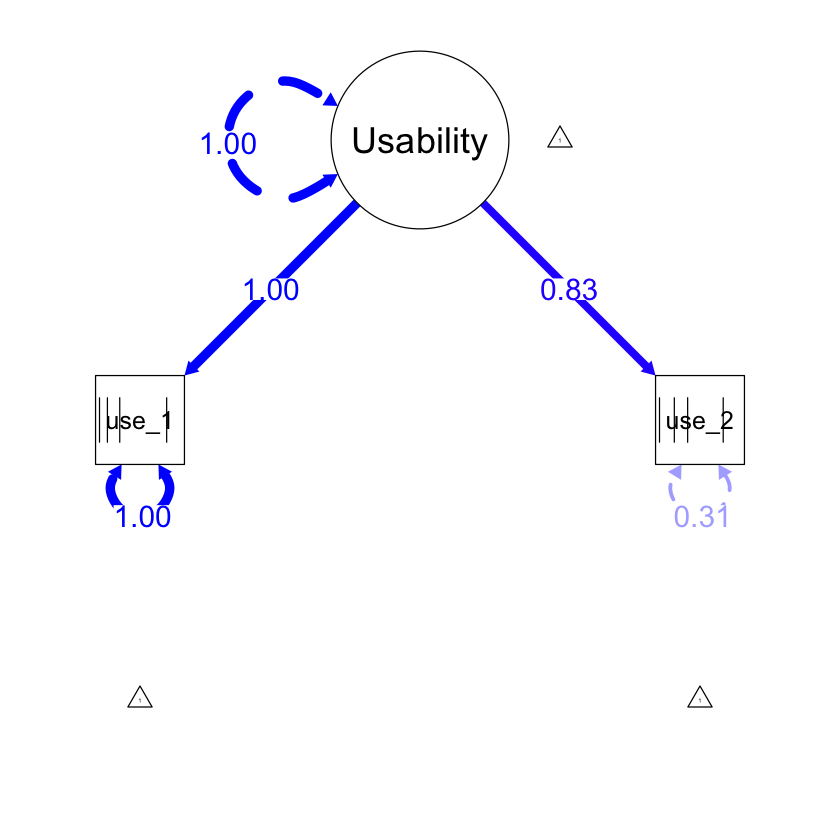

In [227]:
semPaths(Usability.model.fit , what = "std", residuals = TRUE, nCharNodes = 0, 
 sizeMan = 10, sizeLat = 20,
   edge.label.cex = 1.5, legend = FALSE,posCol = c("blue"))
# ggsave("./Fig/CFA_KB.png", dpi=300)
dev.print(pdf, './fig/understandability.pdf')

In [228]:
### Cronbach Alpha
SFD = nudge_df[, c('use_1','use_2')]
sfd_alpha=cronbach.alpha(SFD)
sfd_alpha


Cronbach's alpha for the 'SFD' data-set

Items: 2
Sample units: 180
alpha: 0.841


In [ ]:
# AVE(SFD.fit, obs.var = FALSE)
reliability(Usability.model.fit)

For constructs with categorical indicators, Zumbo et al.`s (2007) "ordinal alpha" is calculated in addition to the standard alpha, which treats ordinal variables as numeric. See Chalmers (2018) for a critique of "alpha.ord" and the response by Zumbo & Kroc (2019). Likewise, average variance extracted is calculated from polychoric (polyserial) not Pearson correlations.




,Usability
alpha,0.8405888
alpha.ord,0.9059852
omega,0.8772594
omega2,0.8772594
omega3,0.8772594
avevar,0.8428987


In [231]:
## introducing Dummies variables
# Create dummy variables for the 'condition' variable
df_dummies  = nudge_df

# Create dummy variables for the 'Color' column
dummies <- model.matrix(~ condition - 1, data = df_dummies)

# Combine the dummy variables with the original dataset (optional)
df_dummies <- cbind(df_dummies, dummies)

In [235]:
usability.model <- usability ~ conditionExplanation  + conditionLabel + conditionHashtags
usability.model.fit <- lm(usability.model, data = df_dummies)
summary <- summary(usability.model.fit)
print(summary)


Call:
lm(formula = usability.model, data = df_dummies)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1833 -0.6833  0.2083  0.7354  1.8167 

Coefficients: (1 not defined because of singularities)
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)            3.1833     0.1215  26.206  < 2e-16 ***
conditionExplanation   0.6083     0.1718   3.541 0.000509 ***
conditionLabel         0.9000     0.1718   5.239 4.55e-07 ***
conditionHashtags          NA         NA      NA       NA    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9409 on 177 degrees of freedom
Multiple R-squared:  0.139,	Adjusted R-squared:  0.1293 
F-statistic: 14.29 on 2 and 177 DF,  p-value: 1.767e-06



In [264]:
usability.model<- usability ~ condition
usability.model.fit <- aov(usability.model, data = nudge_df)
summary <- summary(usability.model.fit)
print(summary)

             Df Sum Sq Mean Sq F value   Pr(>F)    
condition     2   25.3  12.651   14.29 1.77e-06 ***
Residuals   177  156.7   0.885                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [266]:
usability.model_dm <- usability ~ conditionExplanation  + conditionLabel  + conditionHashtags
usability.model_dm.fit <- aov(usability.model_dm , data = df_dummies)
summary <- summary(usability.model_dm.fit)
print(summary)

                      Df Sum Sq Mean Sq F value   Pr(>F)    
conditionExplanation   1    1.0   1.003   1.133    0.289    
conditionLabel         1   24.3  24.300  27.446 4.55e-07 ***
Residuals            177  156.7   0.885                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = usability.model, data = nudge_df)

$condition
                                  diff        lwr        upr     p adj
LLM Hashtag-LLM Explanation -0.6083333 -1.0143821 -0.2022846 0.0014718
MTL Label-LLM Explanation    0.2916667 -0.1143821  0.6977154 0.2088823
MTL Label-LLM Hashtag        0.9000000  0.4939513  1.3060487 0.0000014


Saving 7 x 7 in image


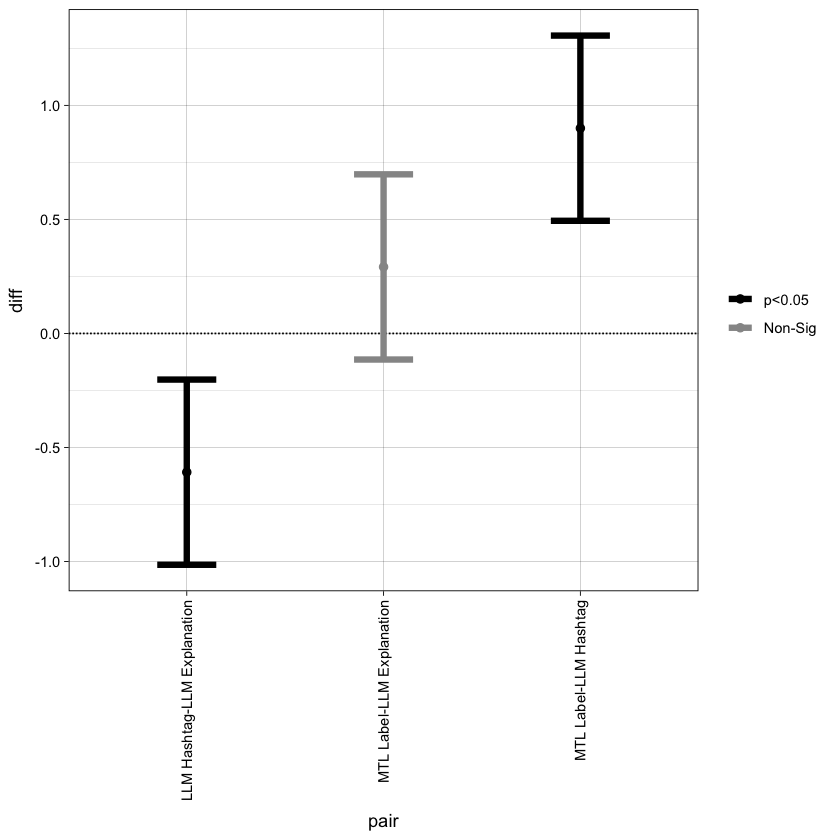

In [265]:
Labels_usability_posthoc <- TukeyHSD(usability.model.fit ,  conf.level = 0.95)
Labels_usability_posthoc

usability_posthocDF = as.data.frame(Labels_usability_posthoc$condition)
usability_posthocDF$pair = rownames(usability_posthocDF)
# rec= as.data.frame(CD_posthoc$PE)
# all = rbind(CD_posthocDF,rec)
# all$pair = rownames(all)




ggplot(usability_posthocDF, aes( colour=cut(`p adj`, c(0, 0.03, 0.05, 1), 
                           label=c("p<0.05","p<0.05","Non-Sig")))) +
  geom_hline(yintercept=0, lty="11", colour="black") +
  geom_errorbar(aes(pair, ymin=lwr, ymax=upr), width=0.3, size=1.8) +
  geom_point(aes(pair, diff), size=2) +
  labs(colour="") +theme_linedraw()+theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +  scale_color_manual(values = c("black", "grey59"))
  ggsave("./fig/usability_HSD.pdf", dpi=300)

### All models

In [102]:
CFA.model <- "ChoiceSatisfaction =~ liked_recipes + prepare_recipes + fit_preference  
understandability =~ under_1 + under_3 + under_2
SubjectiveFoodKnowledge =~ FK_9  + FK_11 + FK_12"

CFA.model.fit <- cfa(CFA.model, data = cfa_df, mimic=c('Mplus'), std.lv = TRUE, ordered = TRUE)
print(summary(CFA.model.fit, fit.measures = T, standardized=T, rsq=TRUE))

lavaan 0.6.13 ended normally after 24 iterations

  Estimator                                       DWLS
  Optimization method                           NLMINB
  Number of model parameters                        48

  Number of observations                           240

Model Test User Model:
                                              Standard      Scaled
  Test Statistic                                28.122      46.815
  Degrees of freedom                                24          24
  P-value (Chi-square)                           0.255       0.004
  Scaling correction factor                                  0.678
  Shift parameter                                            5.368
    simple second-order correction (WLSMV)                        

Model Test Baseline Model:

  Test statistic                              3140.920    1871.469
  Degrees of freedom                                36          36
  P-value                                        0.000       0.000
  Scal

In [103]:
# AVE(SFD.fit, obs.var = FALSE)
reliability(CFA.model.fit)

For constructs with categorical indicators, Zumbo et al.`s (2007) "ordinal alpha" is calculated in addition to the standard alpha, which treats ordinal variables as numeric. See Chalmers (2018) for a critique of "alpha.ord" and the response by Zumbo & Kroc (2019). Likewise, average variance extracted is calculated from polychoric (polyserial) not Pearson correlations.




,ChoiceSatisfaction,understandability,SubjectiveFoodKnowledge
alpha,0.8441916,0.7177264,0.7764396
alpha.ord,0.8914035,0.7956128,0.8466050
omega,0.8333070,0.7343873,0.7786950
omega2,0.8333070,0.7343873,0.7786950
omega3,0.8359693,0.7348752,0.7767512
avevar,0.7362178,0.5642188,0.6459490


## SEM

In [39]:
cfa_df = read.csv('./cnd_csv/cfa_DF.csv')
db_no_use = read.csv('./cnd_csv/allcondition_no_use.csv')

In [64]:
table(db_no_use$condition)


Explanation    Hashtags       Label     noLabel 
         60          60          60          60 

In [65]:
# Ensure condition is a factor
db_no_use$condition <- factor(db_no_use$condition, levels = c("noLabel", "Label", "Hashtags", "Explanation"))



# Create dummy variables for the 'condition' variable
df_dummies  = db_no_use


condition_dummies <- model.matrix(~ condition - 1, data = df_dummies)
df_dummies <- cbind(df_dummies, condition_dummies)

## Only numeric variables
df_dummies <- df_dummies[sapply(df_dummies, is.numeric)]



# # Combine the dummy variables with the original dataset (optional)
# df_dummies <- cbind(df_dummies, dummies)

In [66]:

write.csv(df_dummies,'./cnd_csv/umap_25_df.csv')

In [67]:
# ## User evaluation mean
# allCondition['choice_satisfaction'] = allCondition[['liked_recipes','prepare_recipes','fit_preference','recommend_recipe']].mean(axis=1)
# allCondition['choice_difficulty'] = allCondition[['many_to_choose','easy_choice','choice_overwhelming']].mean(axis=1)
# allCondition['perceived_effort'] = allCondition[['sys_time','unders_sys','many_actions']].mean(axis=1)
# allCondition['SFD'] = allCondition[['FK_9','FK_10','FK_11','FK_12']].mean(axis=1)
# allCondition['Sustain'] = allCondition[['sus_1', 'sus_2', 'sus_3', 'sus_4']].mean(axis=1)

In [ ]:
names(df_dummies)

[1] "person"               "FK_9"                 "FK_10"               
 [4] "FK_11"                "FK_12"                "sus_1"               
 [7] "sus_2"                "sus_3"                "sus_4"               
[10] "Height"               "Weight"               "recipe_id"           
[13] "fsa_score"            "liked_recipes"        "prepare_recipes"     
[16] "fit_preference"       "know_many"            "recommend_recipe"    
[19] "many_to_choose"       "easy_choice"          "choice_overwhelming" 
[22] "sys_time"             "unders_sys"           "many_actions"        
[25] "under_1"              "under_2"              "under_3"             
[28] "n_condition"          "choice_satisfaction"  "choice_difficulty"   
[31] "perceived_effort"     "SFD"                  "Sustain"             
[34] "understand"           "conditionnoLabel"     "conditionLabel"      
[37] "conditionHashtags"    "conditionExplanation"

In [ ]:
print(colSums(is.na(df_dummies)))  # Count missing values in each column

              person                 FK_9                FK_10 
                   0                    0                    0 
               FK_11                FK_12                sus_1 
                   0                    0                    0 
               sus_2                sus_3                sus_4 
                   0                    0                    0 
              Height               Weight            recipe_id 
                   0                    0                    0 
           fsa_score        liked_recipes      prepare_recipes 
                   0                    0                    0 
      fit_preference            know_many     recommend_recipe 
                   0                    0                    0 
      many_to_choose          easy_choice  choice_overwhelming 
                   0                    0                    0 
            sys_time           unders_sys         many_actions 
                   0                    

In [70]:
a = df_dummies$FK_12 
b = df_dummies$easy_choice
df_dummies$FK_12 = 6 - df_dummies$FK_12
df_dummies$easy_choice = 6 - df_dummies$easy_choice


In [124]:
sem_model_with_understan_mi<- "
# Latent Variables
ChoiceSatisfaction =~ liked_recipes + prepare_recipes + fit_preference  
understandability =~   under_3 + under_2
SubjectiveFoodKnowledge =~ FK_9  + FK_11 + FK_12

# Regressions
fsa_score ~ conditionHashtags + conditionExplanation + conditionLabel  
fsa_score ~ SubjectiveFoodKnowledge 
ChoiceSatisfaction ~ SubjectiveFoodKnowledge         
understandability  ~ conditionHashtags + conditionExplanation + conditionLabel  + SubjectiveFoodKnowledge
understandability ~ ChoiceSatisfaction  
"

conditionnoLabelfit <- sem(model = sem_model_with_understan_mi, data = df_dummies, ridge = 1e-5)
print(summary(conditionnoLabelfit, fit.measures = TRUE, standardized = TRUE,rsq=TRUE))

lavaan 0.6.13 ended normally after 51 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        28

  Number of observations                           240

Model Test User Model:
                                                      
  Test statistic                                47.770
  Degrees of freedom                                44
  P-value (Chi-square)                           0.322

Model Test Baseline Model:

  Test statistic                               684.773
  Degrees of freedom                                63
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.994
  Tucker-Lewis Index (TLI)                       0.991

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)              -2565.188
  Loglikelihood unrestricted model (H1)      -25

In [122]:
modificationindices(conditionnoLabelfit) %>%
  as_data_frame() %>%
  arrange(-mi) %>%
  filter(mi > 11) %>%
  select(lhs, op, rhs, mi, epc) %>%
  kable(caption = "Largest MI values for SEMFit", format = "markdown")




Table: Largest MI values for SEMFit

|lhs |op |rhs | mi| epc|
|:---|:--|:---|--:|---:|

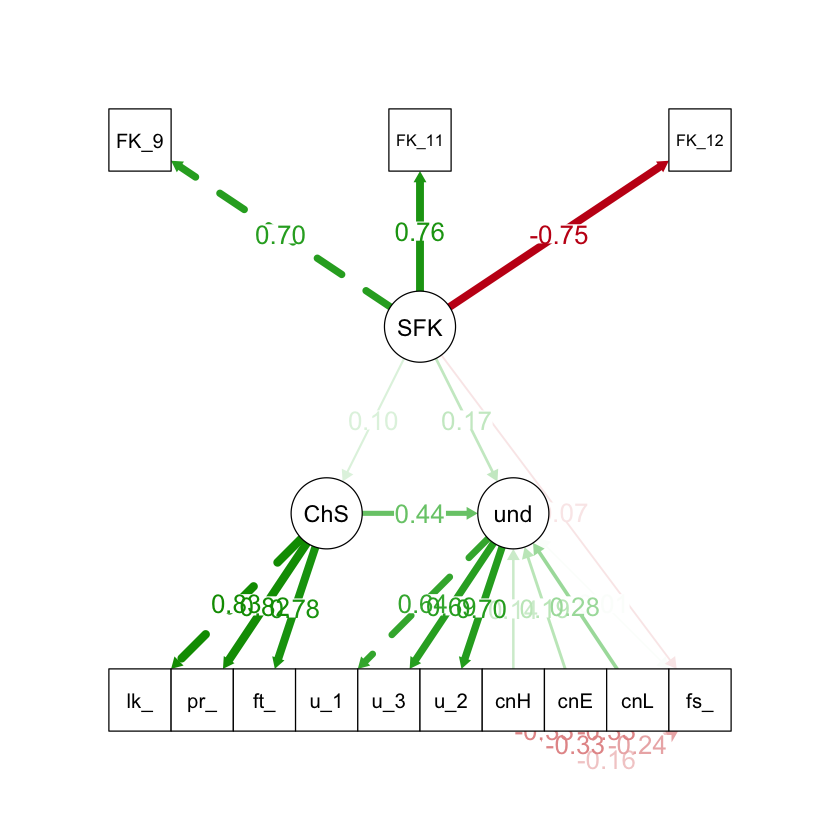

In [ ]:
semPaths(conditionnoLabelfit,
     what = "std",
     whatLabels = "std",
     style="ram",
     edge.label.cex = 1.3,
     layout = 'tree',
     intercepts=FALSE,
     residuals=FALSE,
     sizeMan=7 )

In [104]:
Alain_sem <- "
ChoiceSatisfaction =~ liked_recipes + prepare_recipes + fit_preference  
understandability =~ under_3 + under_2
SubjectiveFoodKnowledge =~ FK_9  + FK_11 + FK_12

# Regressions
fsa_score ~ conditionHashtags + conditionExplanation + conditionLabel  
fsa_score ~ SubjectiveFoodKnowledge  + understandability + ChoiceSatisfaction
ChoiceSatisfaction ~ SubjectiveFoodKnowledge         
understandability  ~ conditionHashtags + conditionExplanation + conditionLabel  + SubjectiveFoodKnowledge
ChoiceSatisfaction ~ understandability 
"


conditionnoLabelfit <- sem(model = Alain_sem, data = df_dummies, ridge = 1e-5)
print(summary(conditionnoLabelfit, fit.measures = TRUE, standardized = TRUE,rsq=TRUE))

lavaan 0.6.13 ended normally after 63 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        29

  Number of observations                           240

Model Test User Model:
                                                      
  Test statistic                                48.388
  Degrees of freedom                                43
  P-value (Chi-square)                           0.264

Model Test Baseline Model:

  Test statistic                               684.773
  Degrees of freedom                                63
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.991
  Tucker-Lewis Index (TLI)                       0.987

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)              -2565.497
  Loglikelihood unrestricted model (H1)      -25

In [113]:
( 0.486+0.569+ 0.564)/3

[1] 0.5396667

## User Evaluation accross conditions 

### Choice satisfaction 

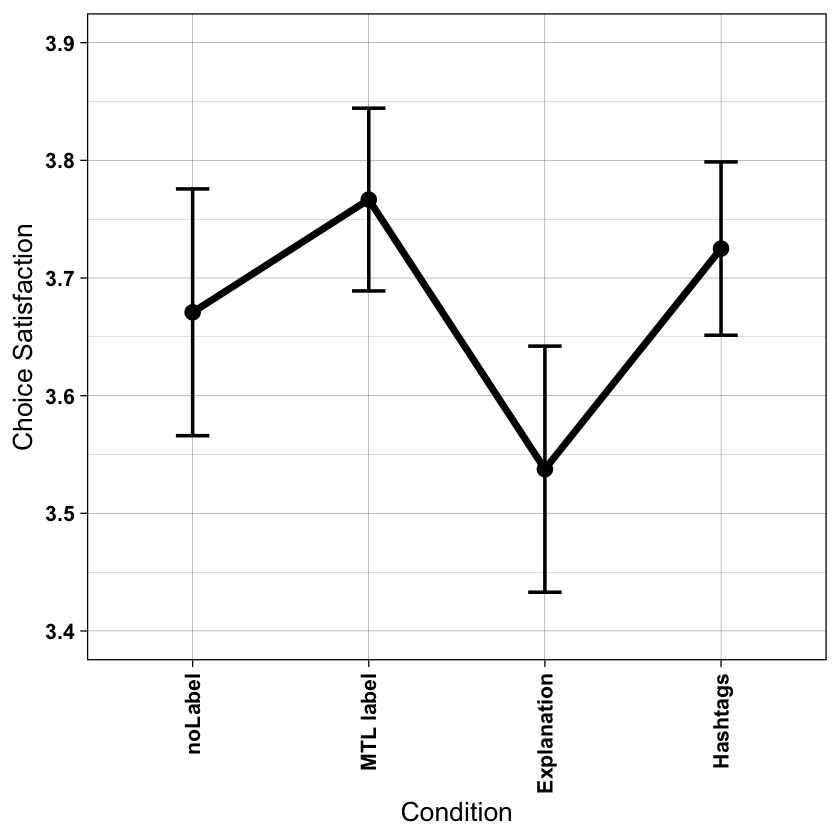

In [267]:
# Group by condition and calculate summary statistics
summary_data <- cfa_df %>%
  group_by(condition) %>%
  summarise(
    mean_choice_sat = mean(choice_satisfaction, na.rm = TRUE),
    se_choice_sat = sd(choice_satisfaction, na.rm = TRUE) / sqrt(n())
  )

# Ensure condition is an ordered factor
summary_data$condition <- ordered(summary_data$condition, levels = c("noLabel", "MTL label", "Explanation", "Hashtags"))

# Plot with error bars
ggplot(summary_data, aes(x = condition, y = mean_choice_sat, group=1)) +
  geom_line(size = 2) +
  geom_errorbar(aes(
    ymin = mean_choice_sat - se_choice_sat,
    ymax = mean_choice_sat + se_choice_sat
  ), size = 1, width = 0.19) +
  geom_point(size = 2, stroke = 2) +  ylim(3.4, 3.9) +
  theme_linedraw(base_size = 16) +
  theme(
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1),
    axis.text = element_text(face = "bold")
  ) +
  labs(x = "Condition", y = "Choice Satisfaction") 
  ggsave("./fig/distribution_choice_sat_SE.pdf",width=6, height=4,dpi=700)

In [ ]:
## ANOVA

df_dummies = cfa_df

# Create dummy variables for the 'Color' column
dummies <- model.matrix(~ condition - 1, data = df_dummies)

# Combine the dummy variables with the original dataset (optional)
label_dummies <- cbind(df_dummies, dummies)

choiceSatisfaction.model <- choice_satisfaction ~ conditionHashtags+conditionExplanation +conditionLabel
choice_sat.fit <- lm(choiceSatisfaction.model, data = label_dummies)
summary <- summary(choice_sat.fit)
print(summary)


Call:
lm(formula = choiceSatisfaction.model, data = label_dummies)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.67083 -0.26667  0.07917  0.32917  1.46250 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           3.67083    0.09138  40.172   <2e-16 ***
conditionHashtags     0.05417    0.12923   0.419    0.675    
conditionExplanation -0.13333    0.12923  -1.032    0.303    
conditionLabel        0.09583    0.12923   0.742    0.459    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7078 on 236 degrees of freedom
Multiple R-squared:  0.01491,	Adjusted R-squared:  0.002388 
F-statistic: 1.191 on 3 and 236 DF,  p-value: 0.314



### Choice difficulty 

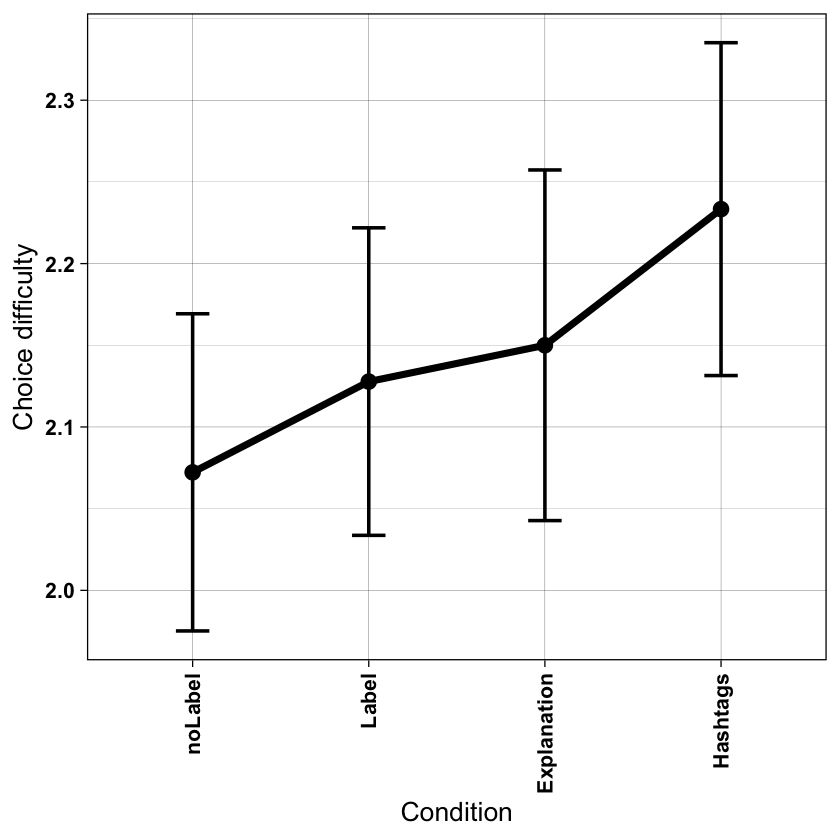

In [164]:
# Group by condition and calculate summary statistics
summary_data <- cfa_df %>%
  group_by(condition) %>%
  summarise(
    mean_choice_diff = mean(choice_difficulty, na.rm = TRUE),
    se_choice_diff = sd(choice_difficulty, na.rm = TRUE) / sqrt(n())
  )

# Ensure condition is an ordered factor
summary_data$condition <- ordered(summary_data$condition, levels = c("noLabel", "Label", "Explanation", "Hashtags"))

# Plot with error bars
ggplot(summary_data, aes(x = condition, y = mean_choice_diff, group=1)) +
  geom_line(size = 2) +
  geom_errorbar(aes(
    ymin = mean_choice_diff - se_choice_diff,
    ymax = mean_choice_diff + se_choice_diff
  ), size = 1, width = 0.19) +
  geom_point(size = 2, stroke = 2) +
  theme_linedraw(base_size = 16) +
  theme(
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1),
    axis.text = element_text(face = "bold")
  ) +
  labs(x = "Condition", y = "Choice difficulty") 
  ggsave("./fig/distribution_choice_diff_SE.pdf",width=6, height=4,dpi=700)

In [ ]:
ChoiceDiff.model <- choice_difficulty ~ conditionHashtags+conditionExplanation +conditionLabel
choice_diff.fit <- lm(ChoiceDiff.model, data = label_dummies)
summary <- summary(choice_diff.fit)
print(summary)


Call:
lm(formula = ChoiceDiff.model, data = label_dummies)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2333 -0.4833 -0.1500  0.5389  2.1833 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           2.07222    0.10021  20.678   <2e-16 ***
conditionHashtags     0.16111    0.14172   1.137    0.257    
conditionExplanation  0.07778    0.14172   0.549    0.584    
conditionLabel        0.05556    0.14172   0.392    0.695    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7762 on 236 degrees of freedom
Multiple R-squared:  0.00563,	Adjusted R-squared:  -0.007011 
F-statistic: 0.4454 on 3 and 236 DF,  p-value: 0.7208



### Perceived Effort 

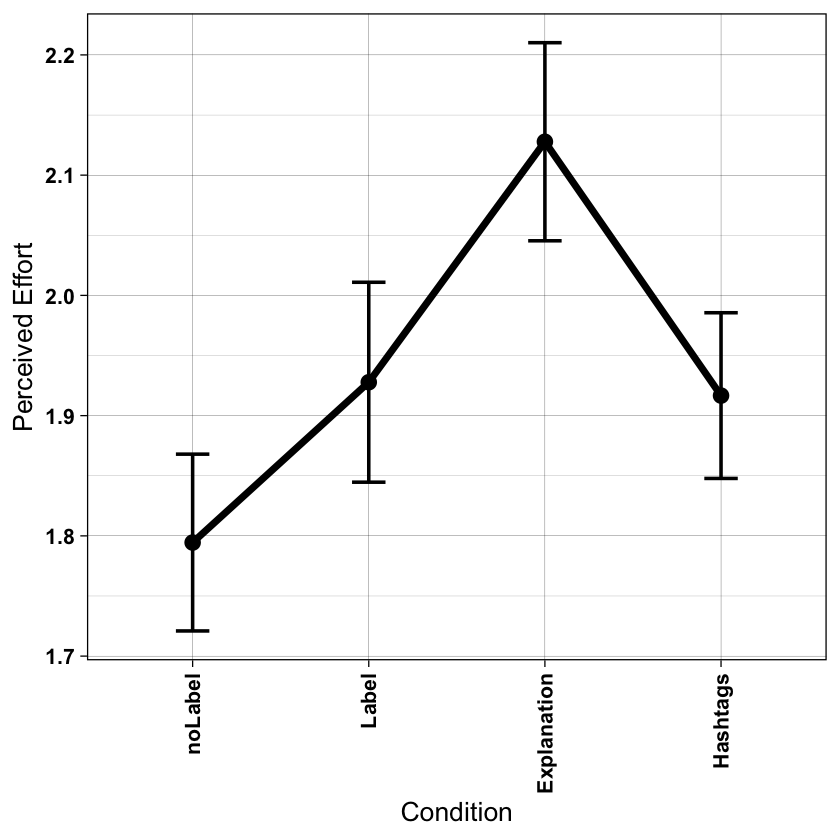

In [ ]:
# Group by condition and calculate summary statistics
summary_data <- cfa_df %>%
  group_by(condition) %>%
  summarise(
    mean_perc_eff = mean(perceived_effort, na.rm = TRUE),
    se_perc_eff = sd(perceived_effort, na.rm = TRUE) / sqrt(n())
  )

# Ensure condition is an ordered factor
summary_data$condition <- ordered(summary_data$condition, levels = c("noLabel", "Label", "Explanation", "Hashtags"))

# Plot with error bars
ggplot(summary_data, aes(x = condition, y = mean_perc_eff, group=1)) +
  geom_line(size = 2) +
  geom_errorbar(aes(
    ymin = mean_perc_eff - se_perc_eff,
    ymax = mean_perc_eff + se_perc_eff
  ), size = 1, width = 0.19) +
  geom_point(size = 2, stroke = 2) +
  theme_linedraw(base_size = 16) +
  theme(
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1),
    axis.text = element_text(face = "bold")
  ) +
  labs(x = "Intervention", y = "Perceived Effort") 
  ggsave("./fig/distribution_perc_eff_SE.pdf",width=6, height=4,dpi=700)

In [ ]:
PercEffort.model <- perceived_effort ~ conditionHashtags+conditionExplanation +conditionLabel
PercEffort.fit <- lm(PercEffort.model, data = label_dummies)
summary <- summary(PercEffort.fit)
print(summary)


Call:
lm(formula = PercEffort.model, data = label_dummies)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.12778 -0.46111  0.07222  0.40556  1.53889 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           1.79444    0.07721  23.240  < 2e-16 ***
conditionHashtags     0.12222    0.10920   1.119  0.26416    
conditionExplanation  0.33333    0.10920   3.053  0.00253 ** 
conditionLabel        0.13333    0.10920   1.221  0.22329    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5981 on 236 degrees of freedom
Multiple R-squared:  0.03902,	Adjusted R-squared:  0.0268 
F-statistic: 3.194 on 3 and 236 DF,  p-value: 0.02428



### Understandability

In [357]:
table(cfa_df$condition)
cfa_df$condition[cfa_df$condition == 'MTL label'] <- "MTL Label"


LLM Explanation     LLM Hashtag       MTL label         noLabel 
             60              60              60              60 

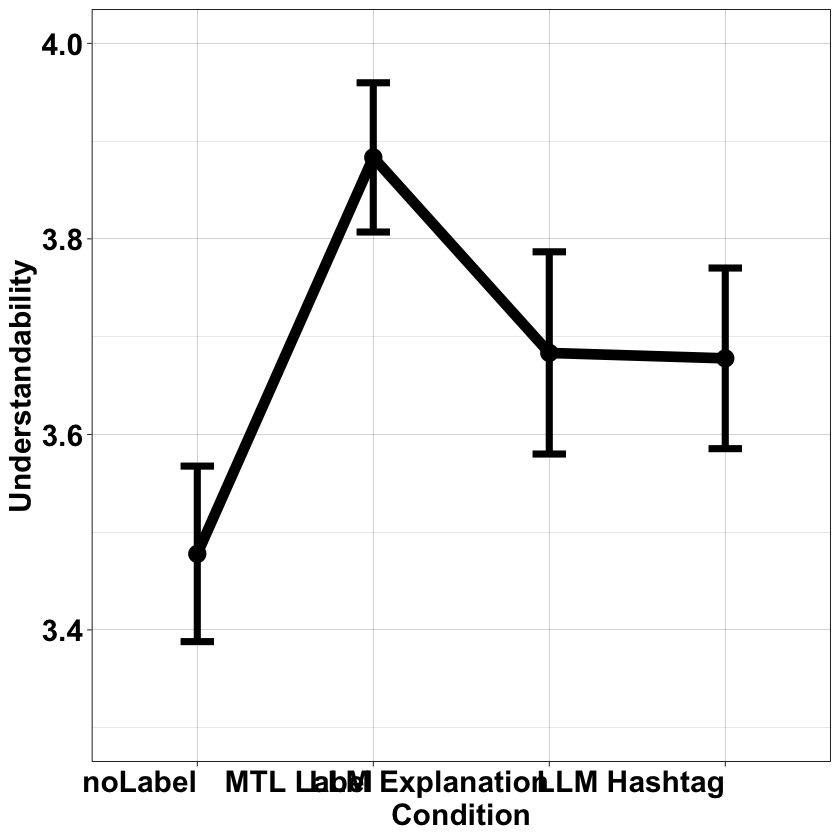

In [407]:
# Group by condition and calculate summary statistics
cfa_df$condition[df$condition == 'Label'] <- "MTL Label"
cfa_df$condition[df$condition == 'Explanation'] <- "LLM Explanation"
cfa_df$condition[df$condition == 'Hashtags'] <- "LLM Hashtag"


summary_data <- cfa_df %>%
  group_by(condition) %>%
  summarise(
    mean_under = mean(understand, na.rm = TRUE),
    se_under = sd(understand, na.rm = TRUE) / sqrt(n())
  )

# Ensure condition is an ordered factor
summary_data$condition <- ordered(summary_data$condition, levels = c('noLabel' ,"MTL Label", "LLM Explanation", "LLM Hashtag"))

# Plot with error bars
ggplot(summary_data, aes(x = condition, y = mean_under, group=1)) +
  geom_line(size = 3, color="black") +
  geom_errorbar(aes(
    ymin = mean_under - se_under,
    ymax = mean_under + se_under
  ), size = 2, width = 0.19, color="black") +
  geom_point(size = 2.5, stroke = 2, color="black")+
  theme_linedraw(base_size = 16) +
  theme(
    axis.text.x = element_text(angle = 0, vjust = 0.5, hjust = 1),
    axis.text = element_text(face = "bold")
  ) +theme_linedraw() +  theme(
axis.text.x = element_text(face = "bold", size = 18),  # Bold and larger x-axis values
    axis.text.y = element_text(face = "bold", size = 18),  # Bold and larger y-axis values
    axis.title.x = element_text(face = "bold", size = 18),  # Bold and larger x-axis title
    axis.title.y = element_text(face = "bold", size = 18),  # Bold and larger y-axis title
    legend.text = element_text(face = "bold", size = 18),   # Bold and larger legend text
    legend.title = element_text(face = "bold", size = 16)  
  ) + theme(
    axis.text.x = element_text(angle = 0, vjust = 1, hjust = 1),
    axis.text = element_text(face = "bold")
  ) + ylim(3.3,4) +
  labs(x = "Condition", y = "Understandability") 
  ggsave("./fig/understand.pdf",width=10, height=6,dpi=700)

  #  Fonts can be somewhat bigger in the labelling, perhaps also on the ticks / axes. Also, I rarely see figures where 'High' is on the left and 'low' is on the right. That's very unconventional. Would switch that. 

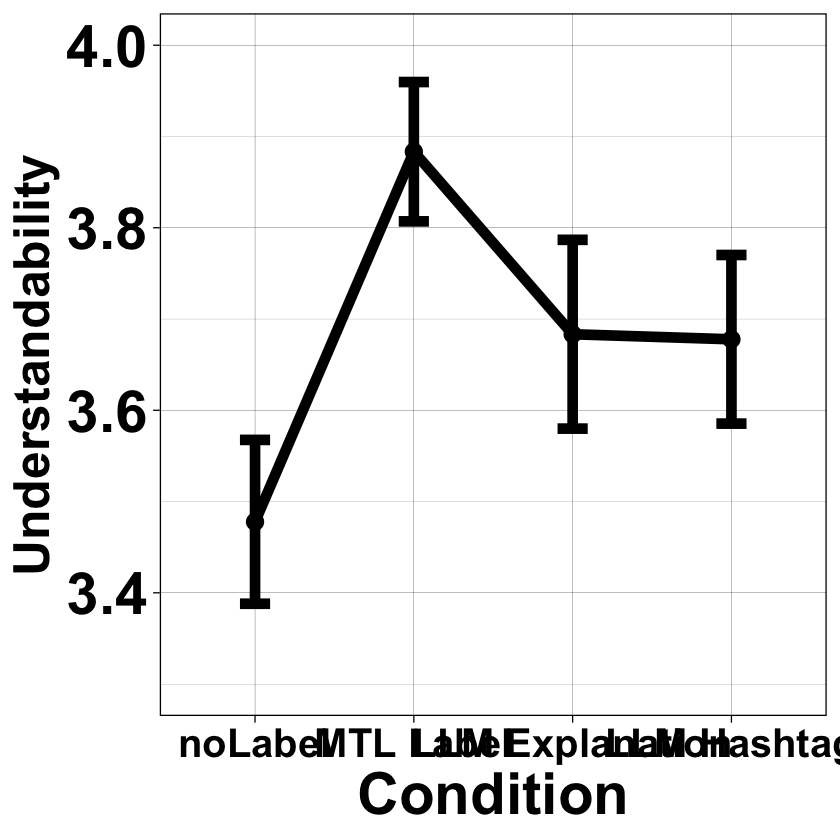

In [410]:
library(ggplot2)
library(dplyr)
library(stringr)  # For text wrapping if needed

# Update condition names
cfa_df$condition[df$condition == 'Label'] <- "MTL Label"
cfa_df$condition[df$condition == 'Explanation'] <- "LLM Explanation"
cfa_df$condition[df$condition == 'Hashtags'] <- "LLM Hashtag"

# Group by condition and calculate summary statistics
summary_data <- cfa_df %>%
  group_by(condition) %>%
  summarise(
    mean_under = mean(understand, na.rm = TRUE),
    se_under = sd(understand, na.rm = TRUE) / sqrt(n())
  )

# Ensure condition is an ordered factor
summary_data$condition <- ordered(summary_data$condition, levels = c('noLabel' ,"MTL Label", "LLM Explanation", "LLM Hashtag"))

# Plot with error bars
ggplot(summary_data, aes(x = condition, y = mean_under, group = 1)) +
  geom_line(size = 3, color = "black") +
  geom_errorbar(aes(
    ymin = mean_under - se_under,
    ymax = mean_under + se_under
  ), size = 3, width = 0.19, color = "black") +
  geom_point(size = 2.5, stroke = 2, color = "black") +
  theme_linedraw(base_size = 16) +
  theme(

    axis.text.x = element_text(face = "bold", size = 24),
    axis.text.y = element_text(face = "bold", size = 35),
    axis.title.x = element_text(face = "bold", size =35),
    axis.title.y = element_text(face = "bold", size = 30),
    legend.text = element_text(face = "bold", size = 20),
    legend.title = element_text(face = "bold", size = 20),
    legend.position = "top",  # Move legend to the top and center it
    legend.justification = "center",
    legend.direction = "horizontal",  # Arrange items in a row
    legend.spacing.x = unit(1, 'cm'),  # Add space between legend items
    legend.key.width = unit(2, "cm")  # Increase legend key width if needed
  ) +
  ylim(3.3, 4) +
  labs(x = "Condition", y = "Understandability") +
  guides(fill = guide_legend(nrow = 1))  # Ensure legend stays in a single row
   ggsave("./fig/understand.pdf",width=12, height=9,dpi=700)


In [ ]:
understand.model <- understand ~ conditionHashtags+conditionExplanation +conditionLabel
understand.fit <- lm(understand.model, data = label_dummies)
summary <- summary(understand.fit)
print(summary)


Call:
lm(formula = understand.model, data = label_dummies)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3500 -0.3500  0.1167  0.4500  1.5222 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           3.47778    0.09099  38.220  < 2e-16 ***
conditionHashtags     0.20000    0.12868   1.554  0.12148    
conditionExplanation  0.20556    0.12868   1.597  0.11152    
conditionLabel        0.40556    0.12868   3.152  0.00183 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7048 on 236 degrees of freedom
Multiple R-squared:  0.04039,	Adjusted R-squared:  0.0282 
F-statistic: 3.311 on 3 and 236 DF,  p-value: 0.0208



In [ ]:
## Anova test 
anova_under= aov(understand ~ conditionHashtags+conditionExplanation +conditionLabel, data = label_dummies)
summary(anova_under)

                      Df Sum Sq Mean Sq F value  Pr(>F)   
conditionHashtags      1   0.00   0.001   0.001 0.97191   
conditionExplanation   1   0.00   0.000   0.001 0.98014   
conditionLabel         1   4.93   4.934   9.932 0.00183 **
Residuals            236 117.24   0.497                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

### Usability

In [313]:
nudge_cnd = read.csv('./cnd_csv/nudge_df.csv')
nudge_cnd$condition[nudge_cnd$condition == 'Label'] <- "MTL label"

In [314]:
table(nudge_cnd$condition)


Explanation    Hashtags   MTL label 
         60          60          60 

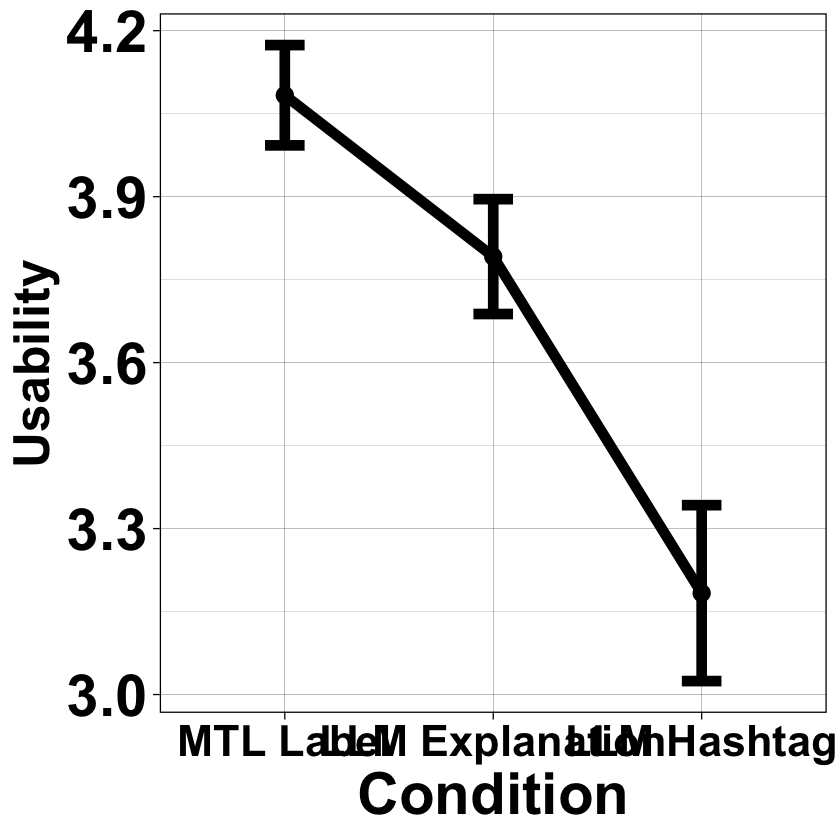

In [411]:
# Group by condition and calculate summary statistics
nudge_df$condition[nudge_df$condition == 'Label'] <- "MTL Label"
nudge_df$condition[nudge_df$condition == 'Explanation'] <- "LLM Explanation"
nudge_df$condition[nudge_df$condition == 'Hashtags'] <- "LLM Hashtag"


summary_data <- nudge_df %>%
  group_by(condition) %>%
  summarise(
    mean_usability = mean(usability, na.rm = TRUE),
    se_usability = sd(usability, na.rm = TRUE) / sqrt(n()),
    sd_usability = sd(usability, na.rm = TRUE)
  )

# Ensure condition is an ordered factor
summary_data$condition <- ordered(summary_data$condition, levels = c("MTL Label", "LLM Explanation", "LLM Hashtag"))

# Plot with error bars
ggplot(summary_data, aes(x = condition, y = mean_usability, group=1)) +
  geom_line(size = 3, color="black") +
  geom_errorbar(aes(
    ymin = mean_usability - se_usability,
    ymax = mean_usability + se_usability
  ), size = 3, width = 0.19, color="black") +
  geom_point(size = 2.5, stroke = 2, color="black")+
  theme_linedraw(base_size = 16) +
  theme(
    axis.text.x = element_text(angle = 0, vjust = 0.5, hjust = 1),
    axis.text = element_text(face = "bold")
  ) +theme_linedraw(base_size = 16) +
  theme(
    axis.text.x = element_text(face = "bold", size = 26),
    axis.text.y = element_text(face = "bold", size = 35),
    axis.title.x = element_text(face = "bold", size =35),
    axis.title.y = element_text(face = "bold", size = 30),
    legend.text = element_text(face = "bold", size = 20),
    legend.title = element_text(face = "bold", size = 20),
    legend.position = "top",  # Move legend to the top and center it
    legend.justification = "center",
    legend.direction = "horizontal",  # Arrange items in a row
    legend.spacing.x = unit(1, 'cm'),  # Add space between legend items
    legend.key.width = unit(2, "cm")  # Increase legend key width if needed
  )+ guides(fill = guide_legend(nrow = 1)) + 
  labs(x = "Condition", y = "Usability") 
  ggsave("./fig/usability.pdf",width=10, height=8,dpi=700)

In [ ]:
summary_data



condition,mean_usability,se_usability,sd_usability
<ord>,<dbl>,<dbl>,<dbl>
LLM Explanation,3.791667,0.10380587,0.8040768
LLM Hashtag,3.183333,0.15898987,1.2315302
MTL Label,4.083333,0.09064012,0.7020953


In [315]:
## Anova test 
anova_usa= aov(usability  ~  condition, data = nudge_cnd)
summary(anova_usa)

             Df Sum Sq Mean Sq F value   Pr(>F)    
condition     2   25.3  12.651   14.29 1.77e-06 ***
Residuals   177  156.7   0.885                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [ ]:
Labels_usa_posthoc <- TukeyHSD(anova_usa,  conf.level = 0.95)
Labels_usa_posthoc

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = usability ~ condition, data = nd_dummies)

$condition
                           diff        lwr        upr     p adj
Explanation-Label    -0.2916667 -0.6977154  0.1143821 0.2088823
Hashtags-Label       -0.9000000 -1.3060487 -0.4939513 0.0000014
Hashtags-Explanation -0.6083333 -1.0143821 -0.2022846 0.0014718


In [ ]:
usa_posthocDF = as.data.frame(Labels_usa_posthoc$condition)
usa_posthocDF$pair = rownames(usa_posthocDF)

Saving 7 x 7 in image


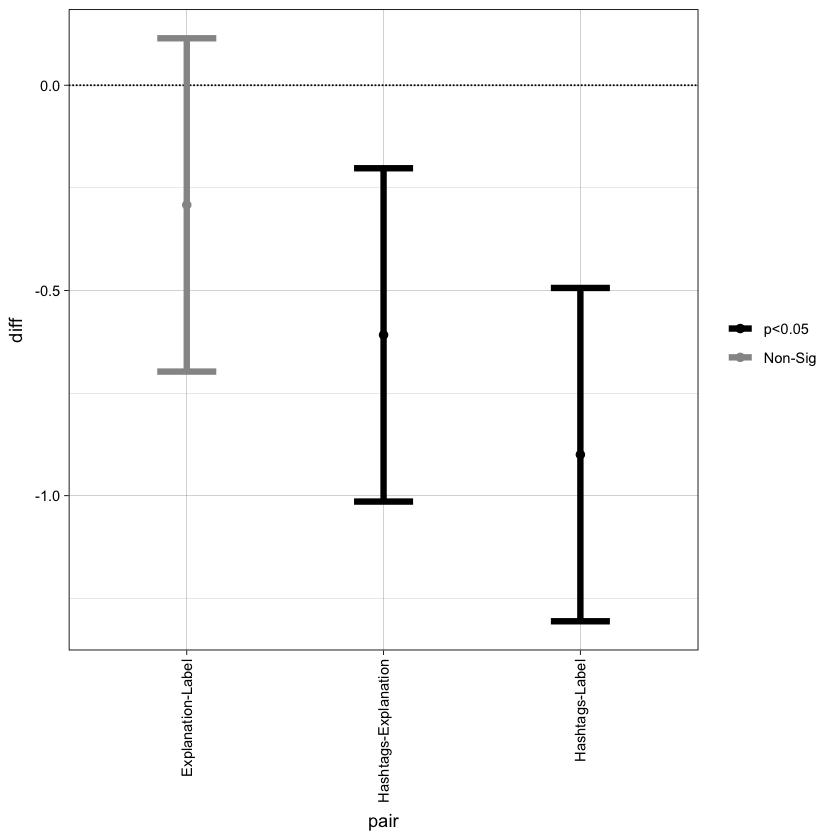

In [ ]:

ggplot(usa_posthocDF, aes( colour=cut(`p adj`, c(0, 0.03, 0.05, 1), 
                           label=c("p<0.05","p<0.05","Non-Sig")))) +
  geom_hline(yintercept=0, lty="11", colour="black") +
  geom_errorbar(aes(pair, ymin=lwr, ymax=upr), width=0.3, size=1.8) +
  geom_point(aes(pair, diff), size=2) +
  labs(colour="") +theme_linedraw()+theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +  scale_color_manual(values = c("black", "grey59"))
  ggsave("./fig/usa_HSD.pdf", dpi=300)

In [294]:
## Anova test 
anova_usa= aov(usability  ~  condition, data = nudge_cnd)
summary(anova_usa)

             Df Sum Sq Mean Sq F value   Pr(>F)    
condition     2   25.3  12.651   14.29 1.77e-06 ***
Residuals   177  156.7   0.885                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

### Sustainability


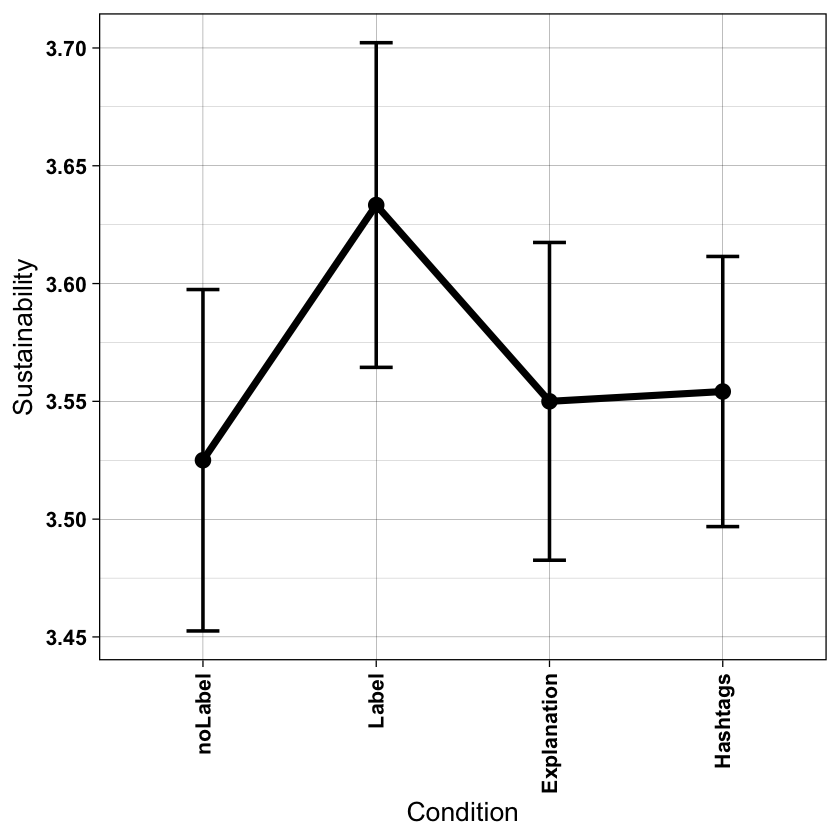

In [ ]:
# Group by condition and calculate summary statistics
summary_data <- cfa_df %>%
  group_by(condition) %>%
  summarise(
    mean_sus = mean(Sustain, na.rm = TRUE),
    se_sus = sd(Sustain, na.rm = TRUE) / sqrt(n())
  )

# Ensure condition is an ordered factor
summary_data$condition <- ordered(summary_data$condition, levels = c("noLabel", "Label", "Explanation", "Hashtags"))

# Plot with error bars
ggplot(summary_data, aes(x = condition, y = mean_sus, group=1)) +
  geom_line(size = 2) +
  geom_errorbar(aes(
    ymin = mean_sus - se_sus,
    ymax = mean_sus + se_sus
  ), size = 1, width = 0.19) +
  geom_point(size = 2, stroke = 2) +
  theme_linedraw(base_size = 16) +
  theme(
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1),
    axis.text = element_text(face = "bold")
  ) +
  labs(x = "Condition", y = "Sustainability") 
  ggsave("./fig/distribution_Sustainability.pdf",width=6, height=4,dpi=700)

In [ ]:
sustainability.model <- Sustain ~ conditionHashtags+conditionExplanation +conditionLabel
sustainability.fit <- lm(sustainability.model, data = label_dummies)
summary <- summary(sustainability.fit)
print(summary)


Call:
lm(formula = sustainability.model, data = label_dummies)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.04167 -0.32500 -0.04167  0.38333  1.70833 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           3.36667    0.07568  44.487   <2e-16 ***
conditionHashtags    -0.07917    0.10702  -0.740    0.460    
conditionExplanation -0.07500    0.10702  -0.701    0.484    
conditionLabel       -0.04167    0.10702  -0.389    0.697    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5862 on 236 degrees of freedom
Multiple R-squared:  0.002981,	Adjusted R-squared:  -0.009693 
F-statistic: 0.2352 on 3 and 236 DF,  p-value: 0.8718



### SFD

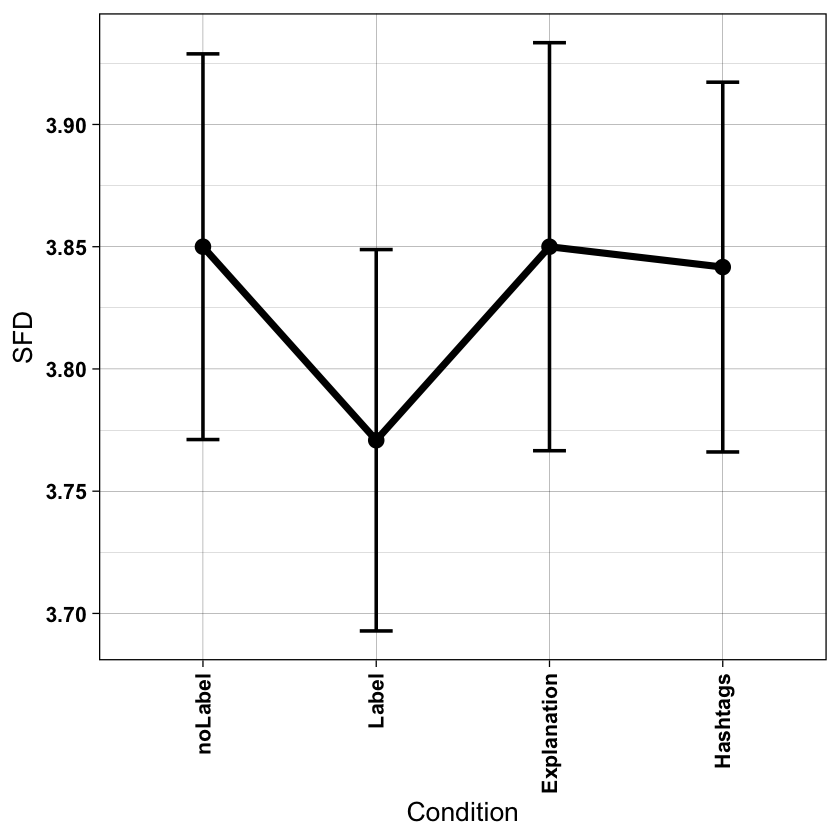

In [ ]:
# Group by condition and calculate summary statistics
summary_data <- cfa_df %>%
  group_by(condition) %>%
  summarise(
    mean_sfd = mean(SFD, na.rm = TRUE),
    se_sfd = sd(SFD, na.rm = TRUE) / sqrt(n())
  )

# Ensure condition is an ordered factor
summary_data$condition <- ordered(summary_data$condition, levels = c("noLabel", "Label", "Explanation", "Hashtags"))

# Plot with error bars
ggplot(summary_data, aes(x = condition, y = mean_sfd, group=1)) +
  geom_line(size = 2) +
  geom_errorbar(aes(
    ymin = mean_sfd - se_sfd,
    ymax = mean_sfd + se_sfd
  ), size = 1, width = 0.19) +
  geom_point(size = 2, stroke = 2) +
  theme_linedraw(base_size = 16) +
  theme(
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1),
    axis.text = element_text(face = "bold")
  ) +
  labs(x = "Condition", y = "SFD") 
  ggsave("./fig/distribution_SFD.pdf",width=6, height=4,dpi=700)

In [ ]:
SFD.model <- SFD ~ conditionHashtags+conditionExplanation +conditionLabel
SFD.fit <- lm(SFD.model, data = label_dummies)
summary <- summary(SFD.fit)
print(summary)


Call:
lm(formula = SFD.model, data = label_dummies)

Residuals:
   Min     1Q Median     3Q    Max 
-1.850 -0.350  0.150  0.400  1.229 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           3.850e+00  7.904e-02  48.711   <2e-16 ***
conditionHashtags    -8.333e-03  1.118e-01  -0.075    0.941    
conditionExplanation  2.809e-16  1.118e-01   0.000    1.000    
conditionLabel       -7.917e-02  1.118e-01  -0.708    0.479    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6122 on 236 degrees of freedom
Multiple R-squared:  0.002991,	Adjusted R-squared:  -0.009683 
F-statistic: 0.236 on 3 and 236 DF,  p-value: 0.8712



### Understand, healthiniess and satisfaction

In [ ]:

cfa_df$condition[cfa_df$condition == 'Label'] <- "MTL Label"
cfa_df$condition[cfa_df$condition == 'Explanation'] <- "LLM explanation"
cfa_df$condition[cfa_df$condition == 'Hashtag'] <- "LLM hashtag"
table(cfa_df$condition)


       Hashtags LLM explanation       MTL Label         noLabel 
             60              60              60              60 

In [273]:
df = read.csv('./cnd_csv/allCond.csv')
names(df)
df$condition[df$condition == 'Label'] <- "MTL Label"

[1] "person"              "age"                 "country"            
 [4] "education"           "gender"              "FK_9"               
 [7] "FK_10"               "FK_11"               "FK_12"              
[10] "sus_1"               "sus_2"               "sus_3"              
[13] "sus_4"               "session_id"          "Height"             
[16] "Weight"              "RecipeWebUsage"      "HomeCook"           
[19] "CookingExp"          "EatingGoals"         "Depression"         
[22] "PhysicalActivity"    "SleepHours"          "CookingTime"        
[25] "recipe_id"           "recipe_name"         "Nutri_score"        
[28] "fsa_score"           "healthiness"         "liked_recipes"      
[31] "prepare_recipes"     "fit_preference"      "know_many"          
[34] "recommend_recipe"    "many_to_choose"      "easy_choice"        
[37] "choice_overwhelming" "sys_time"            "unders_sys"         
[40] "many_actions"        "under_1"             "under_2"            
[43] "under_3"             "condition"           "n_condition"        
[46] "use_1"               "use_2"               "llm_hashtag"        
[49] "llm_explanation"     "choice_satisfaction" "choice_difficulty"  
[52] "perceived_effort"    "SFD"                 "Sustain"            
[55] "understand"          "usability"           "under_level"        
[58] "SFD_level"

`summarise()` has grouped output by 'condition'. You can override using the
`.groups` argument.


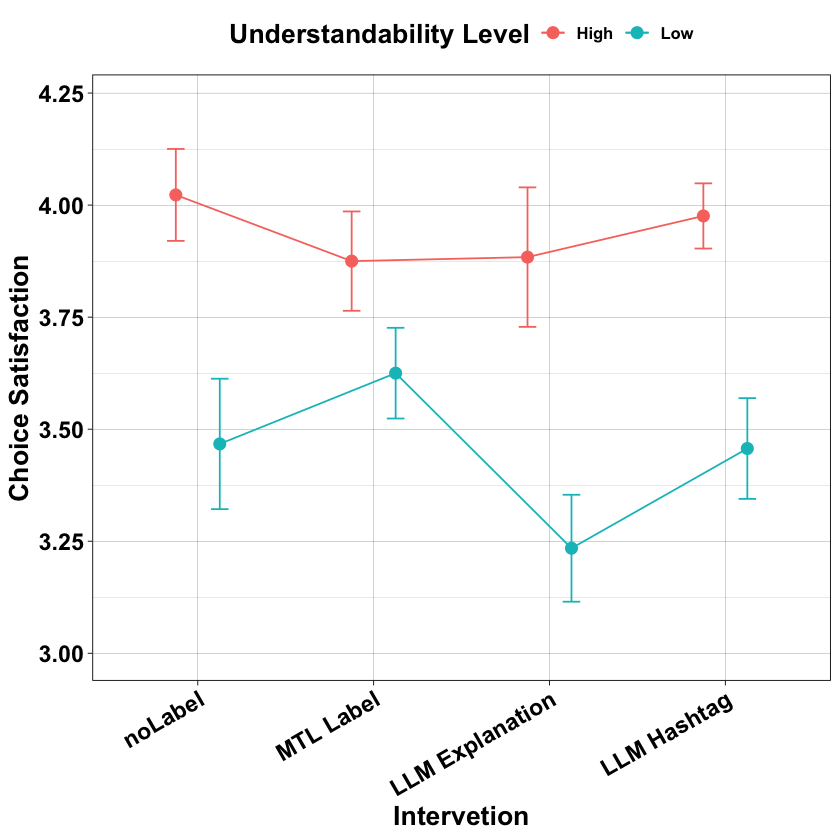

In [112]:

# Calculate mean and standard error of choice satisfaction by condition and understandability level
df_summary <- df %>%
  group_by(condition, under_level) %>%
  summarise(
    mean_satisfaction = mean(choice_satisfaction, na.rm = TRUE),
    se_satisfaction = sd(choice_satisfaction, na.rm = TRUE) / sqrt(n())
  )
# df_summary$condition[df_summary$condition == 'MTL label'] <- "MTL Label"
df_summary$condition[df_summary$condition == 'Explanation'] <- "LLM Explanation"
df_summary$condition[df_summary$condition == 'Hashtags'] <- "LLM Hashtag"
df_summary$condition <- ordered(df_summary$condition, levels = c('noLabel' ,"MTL Label", "LLM Explanation", "LLM Hashtag"))
# Create the plot
ggplot(df_summary, aes(x =condition , y = mean_satisfaction, color = under_level, group = under_level)) +
  geom_point(position = position_dodge(width = 0.5), size = 3) +  # Add points
  geom_line(position = position_dodge(width = 0.5)) +  # Connect points with lines
  geom_errorbar(
    aes(ymin = mean_satisfaction - se_satisfaction, ymax = mean_satisfaction + se_satisfaction),
    width = 0.2,  # Width of the error bars
    position = position_dodge(width = 0.5)  # Ensure error bars align with points
  ) +
  labs(
    x = "Intervetion",
    y = "Choice Satisfaction",
    color = "Understandability Level",
  ) +  theme_linedraw() +  theme(
axis.text.x = element_text(face = "bold", size = 14),  # Bold and larger x-axis values
    axis.text.y = element_text(face = "bold", size = 14),  # Bold and larger y-axis values
    axis.title.x = element_text(face = "bold", size = 16),  # Bold and larger x-axis title
    axis.title.y = element_text(face = "bold", size = 16),  # Bold and larger y-axis title
    legend.text = element_text(face = "bold", size = 10),   # Bold and larger legend text
    legend.title = element_text(face = "bold", size = 16)  
  )+ ylim(3,4.23) + 

  theme(
    axis.text.x = element_text(angle = 30, hjust = 1),  # Rotate x-axis labels if needed
    legend.position = "top"  # Place legend on top
  ) 
  ggsave("./fig/under__level.pdf",width=6, height=4,dpi=1000)


`summarise()` has grouped output by 'condition'. You can override using the
`.groups` argument.


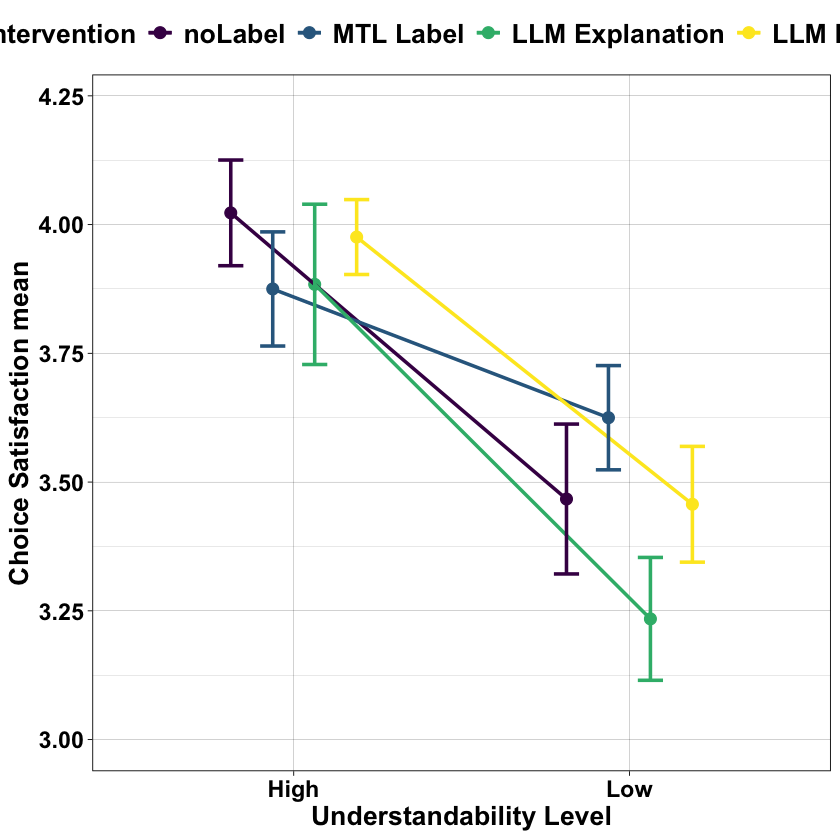

In [178]:
# Calculate mean and standard error of choice satisfaction by condition and understandability level
df_summary <- df %>%
  group_by(condition, under_level) %>%
  summarise(
    mean_satisfaction = mean(choice_satisfaction, na.rm = TRUE),
    se_satisfaction = sd(choice_satisfaction, na.rm = TRUE) / sqrt(n())
  )

# Format condition labels for clarity
df_summary$condition[df_summary$condition == 'MTL label'] <- "MTL Label"
df_summary$condition[df_summary$condition == 'Explanation'] <- "LLM Explanation"
df_summary$condition[df_summary$condition == 'Hashtags'] <- "LLM Hashtag"
df_summary$condition <- ordered(df_summary$condition, levels = c('noLabel', "MTL Label", "LLM Explanation", "LLM Hashtag"))

# Create the plot
ggplot(df_summary, aes(x = under_level, y = mean_satisfaction, color = condition, group = condition)) +
  geom_point(position = position_dodge(width = 0.5), size = 3) +  # Add points
  geom_line(position = position_dodge(width = 0.5), size=1) +  # Connect points with lines
  geom_errorbar(
    aes(ymin = mean_satisfaction - se_satisfaction, ymax = mean_satisfaction + se_satisfaction),
    width = 0.3, size=1, # Width of the error bars
    position = position_dodge(width = 0.5)  # Ensure error bars align with points
  ) +
  labs(
    x = "Understandability Level",
    y = "Choice Satisfaction mean",
    color = "Intervention"
  ) +
  theme_linedraw() +
  theme(
    axis.text.x = element_text(face = "bold", size = 14),  # Bold and larger x-axis values
    axis.text.y = element_text(face = "bold", size = 14),  # Bold and larger y-axis values
    axis.title.x = element_text(face = "bold", size = 16),  # Bold and larger x-axis title
    axis.title.y = element_text(face = "bold", size = 16),  # Bold and larger y-axis title
    legend.text = element_text(face = "bold", size = 16),   # Bold and larger legend text
    legend.title = element_text(face = "bold", size = 16),
    # axis.text.x = element_text(angle = 30, hjust = 1),  # Rotate x-axis labels if needed
    legend.position = "top"  # Place legend on top
  ) +
  ylim(3, 4.23)  # Set y-axis limits
  ggsave("./fig/under__level_sat_interv.pdf",width=6, height=6,dpi=1000)

`summarise()` has grouped output by 'condition'. You can override using the
`.groups` argument.


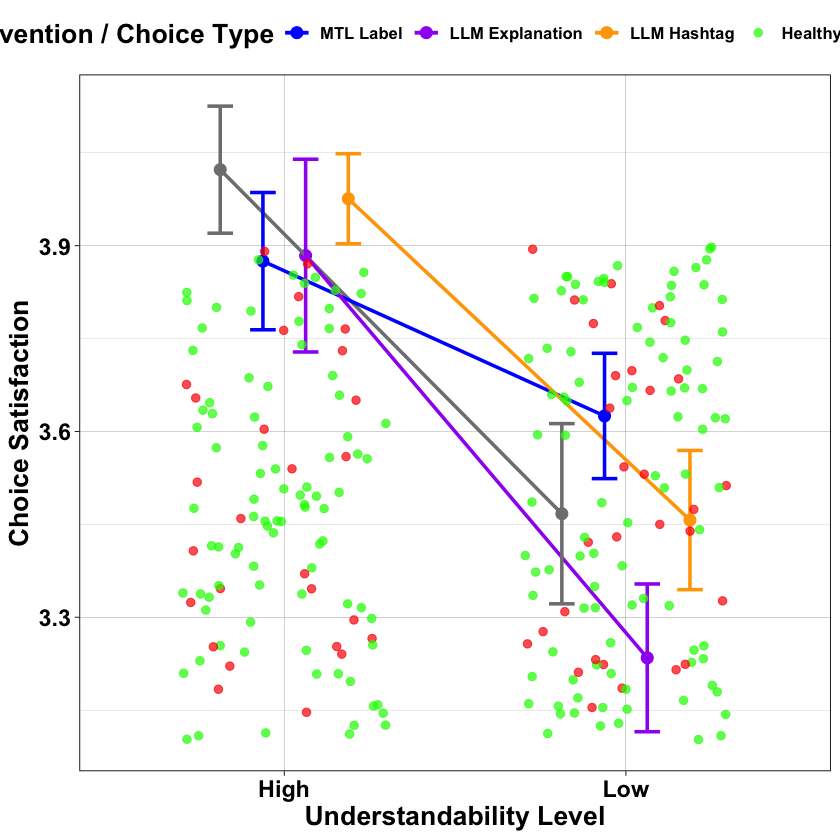

In [114]:
# Calculate mean and standard error of choice satisfaction by condition and understandability level
df_summary <- df %>%
  group_by(condition, under_level) %>%
  summarise(
    mean_satisfaction = mean(choice_satisfaction, na.rm = TRUE),
    se_satisfaction = sd(choice_satisfaction, na.rm = TRUE) / sqrt(n())
  )

# Prepare data for cloud points (healthy/unhealthy choices)
expanded_healthiness <- df %>%
  select(under_level, condition, healthiness) %>%
  filter(!is.na(healthiness)) %>%
  mutate(healthiness = ifelse(healthiness == "healthy", "Healthy", "Unhealthy"))

# Format condition labels for both datasets
df_summary$condition[df_summary$condition == 'MTL label'] <- "MTL Label"
df_summary$condition[df_summary$condition == 'Explanation'] <- "LLM Explanation"
df_summary$condition[df_summary$condition == 'Hashtags'] <- "LLM Hashtag"
df_summary$condition <- ordered(df_summary$condition, levels = c('noLabel', "MTL Label", "LLM Explanation", "LLM Hashtag"))

expanded_healthiness$condition[expanded_healthiness$condition == 'MTL label'] <- "MTL Label"
expanded_healthiness$condition[expanded_healthiness$condition == 'Explanation'] <- "LLM Explanation"
expanded_healthiness$condition[expanded_healthiness$condition == 'Hashtags'] <- "LLM Hashtag"
expanded_healthiness$condition <- ordered(expanded_healthiness$condition, levels = c('noLabel', "MTL Label", "LLM Explanation", "LLM Hashtag"))

# Create the plot
ggplot(df_summary, aes(x = under_level, y = mean_satisfaction, color = condition, group = condition)) +
  geom_point(position = position_dodge(width = 0.5), size = 3) +  # Add points for mean satisfaction
  geom_line(position = position_dodge(width = 0.5), size = 1) +  # Connect points with lines
  geom_errorbar(
    aes(ymin = mean_satisfaction - se_satisfaction, ymax = mean_satisfaction + se_satisfaction),
    width = 0.3, size = 1, # Width of the error bars
    position = position_dodge(width = 0.5)  # Ensure error bars align with points
  ) +
  geom_jitter(
    data = expanded_healthiness,
    aes(x = under_level, y = 3.5, color = healthiness),  # Overlay points at y=3.5 for visibility
    width = 0.3, size = 2, alpha = 0.7  # Jitter and style for cloud points
  ) +
  scale_color_manual(
    values = c("MTL Label" = "blue", "LLM Explanation" = "purple", "LLM Hashtag" = "orange", 
               "Healthy" = "green", "Unhealthy" = "red")  # Define colors for interventions and choice types
  ) +
  labs(
    x = "Understandability Level",
    y = "Choice Satisfaction",
    color = "Intervention / Choice Type"
  ) +
  theme_linedraw() +
  theme(
    axis.text.x = element_text(face = "bold", size = 14),  # Bold and larger x-axis values
    axis.text.y = element_text(face = "bold", size = 14),  # Bold and larger y-axis values
    axis.title.x = element_text(face = "bold", size = 16),  # Bold and larger x-axis title
    axis.title.y = element_text(face = "bold", size = 16),  # Bold and larger y-axis title
    legend.text = element_text(face = "bold", size = 10),   # Bold and larger legend text
    legend.title = element_text(face = "bold", size = 16),
    legend.position = "top"  # Place legend on top
  )


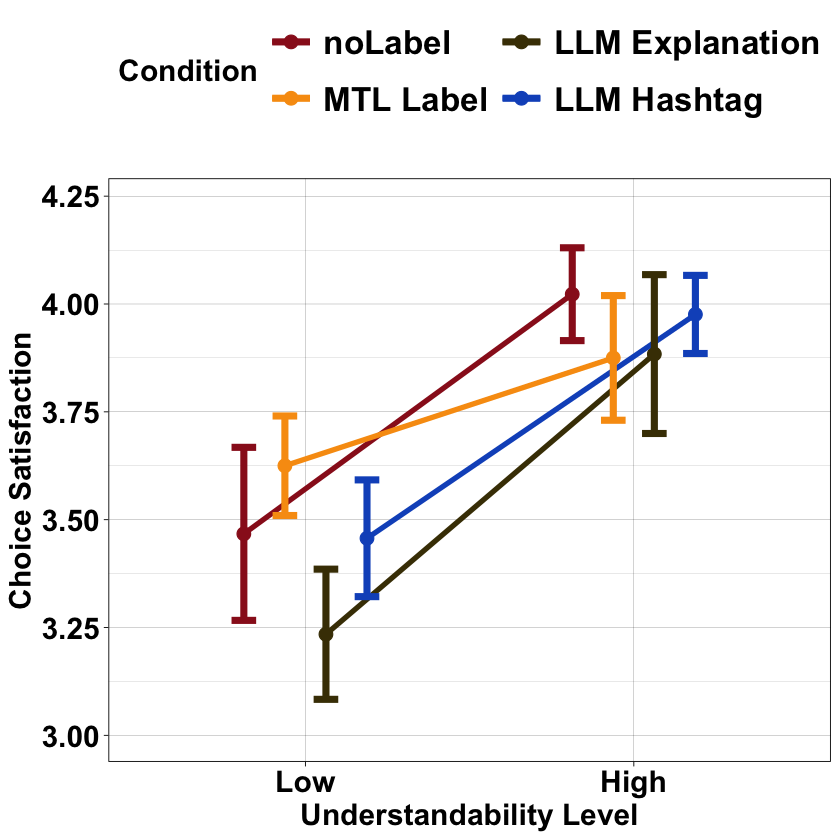

In [358]:
# Calculate mean and standard error of choice satisfaction by condition and understandability level
df_summary <- df %>%
  group_by(condition, under_level) %>%
  summarise(
    mean_satisfaction = mean(choice_satisfaction, na.rm = TRUE),
    se_satisfaction = sd(choice_satisfaction, na.rm = TRUE) / sqrt(20),
    .groups = 'drop'  # Avoid errors due to incorrect grouping
  )

# Format condition labels for clarity
df_summary$condition[df_summary$condition == 'MTL label'] <- "MTL Label"
df_summary$condition[df_summary$condition == 'Explanation'] <- "LLM Explanation"
df_summary$condition[df_summary$condition == 'Hashtags'] <- "LLM Hashtag"
df_summary$condition <- ordered(df_summary$condition, levels = c('noLabel', "MTL Label", "LLM Explanation", "LLM Hashtag"))
df_summary$under_level <- ordered(df_summary$under_level, levels = c("Low", "High"))

# Create the plot
ggplot(df_summary, aes(x = under_level, y = mean_satisfaction, color = condition, group = condition)) +
  geom_point(position = position_dodge(width = 0.5), size = 3.5) +  # Add points
  geom_line(position = position_dodge(width = 0.5), size = 1.5) +  # Connect points with lines
  geom_errorbar(
    aes(ymin = mean_satisfaction - se_satisfaction, ymax = mean_satisfaction + se_satisfaction),
    width = 0.3, size = 2, # Width of the error bars
    position = position_dodge(width = 0.5)  # Ensure error bars align with points
  ) +
  labs(
    x = "Understandability Level",
    y = "Choice Satisfaction",
    color = "Condition"
  ) +
  theme_linedraw() +  scale_color_manual(values=c(c( "#9A1A20","#F89C11","#473a04", "#1256C4")))+
  theme(
    axis.text.x = element_text(face = "bold", size = 18),  # Bold and larger x-axis values
    axis.text.y = element_text(face = "bold", size = 18),  # Bold and larger y-axis values
    axis.title.x = element_text(face = "bold", size = 18),  # Bold and larger x-axis title
    axis.title.y = element_text(face = "bold", size = 18),  # Bold and larger y-axis title
    legend.text = element_text(face = "bold", size = 20),   # Bold and larger legend text
    legend.title = element_text(face = "bold", size = 18),
    legend.position = "top",  # Place the main legend on top
    legend.box = "vertical",  # Stack the legend vertically
    legend.box.spacing = unit(1, "cm"),
       legend.key.size = unit(1, "cm"),    # Add space between legend boxes
  ) +
  guides(
    color = guide_legend(nrow = 2)  # Specify the number of rows in the legend
  ) +
  ylim(3, 4.23)  # Set y-axis limits

# Save the plot
ggsave("./fig/under__level_sat_interv.pdf", width = 7, height = 7, dpi = 1000)


### Understand, SFD 

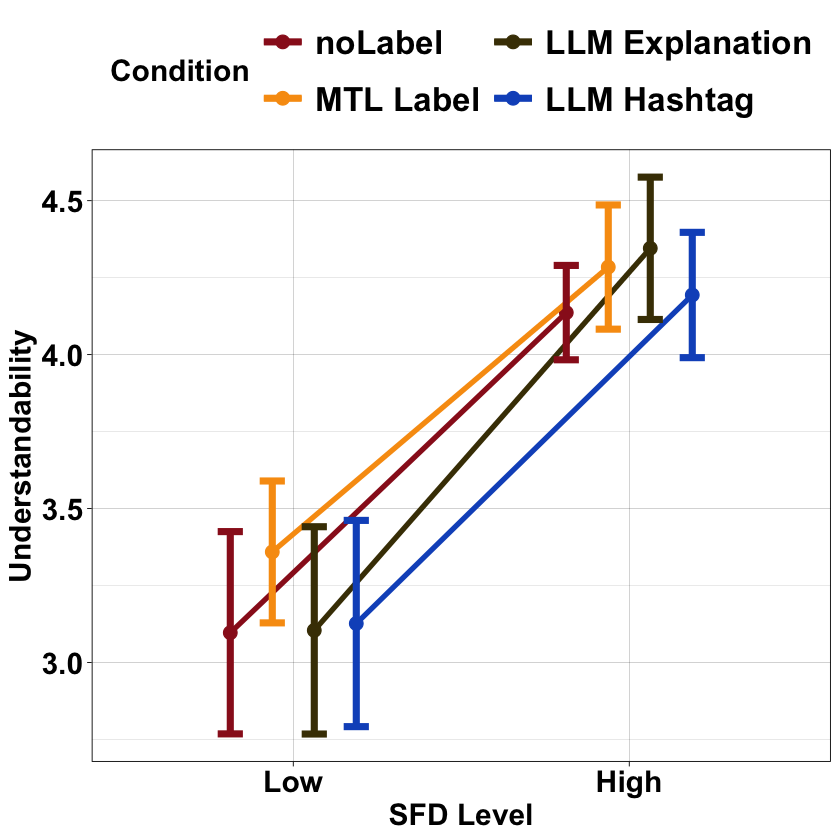

In [354]:
# Calculate mean and standard error of choice satisfaction by condition and understandability level
df_summary <- df %>%
  group_by(condition, SFD_level) %>%
  summarise(
    mean_under = mean(understand, na.rm = TRUE),
    se_under = sd(understand, na.rm = TRUE) / sqrt(3),
    .groups = 'drop'  # Avoid errors due to incorrect grouping
  )

# Format condition labels for clarity
df_summary$condition[df_summary$condition == 'MTL label'] <- "MTL Label"
df_summary$condition[df_summary$condition == 'Explanation'] <- "LLM Explanation"
df_summary$condition[df_summary$condition == 'Hashtags'] <- "LLM Hashtag"
df_summary$condition <- ordered(df_summary$condition, levels = c('noLabel', "MTL Label", "LLM Explanation", "LLM Hashtag"))
df_summary$SFD_level <- ordered(df_summary$SFD_level, levels = c("Low", "High"))

# Create the plot
ggplot(df_summary, aes(x = SFD_level, y = mean_under, color = condition, group = condition)) +
  geom_point(position = position_dodge(width = 0.5), size = 3.5) +  # Add points
  geom_line(position = position_dodge(width = 0.5), size = 1.5) +  # Connect points with lines
  geom_errorbar(
    aes(ymin = mean_under - se_under, ymax = mean_under + se_under),
    width = 0.3, size = 2, # Width of the error bars
    position = position_dodge(width = 0.5)  # Ensure error bars align with points
  ) +
  labs(
    x = "SFD Level",
    y = "Understandability",
    color = "Condition"
  ) +
  theme_linedraw() +  scale_color_manual(values=c(c( "#9A1A20","#F89C11","#473a04", "#1256C4")))+
    theme(
   
    axis.text.x = element_text(face = "bold", size = 18),  # Bold and larger x-axis values
    axis.text.y = element_text(face = "bold", size = 18),  # Bold and larger y-axis values
    axis.title.x = element_text(face = "bold", size = 18),  # Bold and larger x-axis title
    axis.title.y = element_text(face = "bold", size = 18),  # Bold and larger y-axis title
    legend.text = element_text(face = "bold", size = 20),   # Bold and larger legend text
    legend.title = element_text(face = "bold", size = 18),
    legend.position = "top",  # Place the main legend on top
    legend.box = "vertical",  # Stack the legend vertically
    # legend.box.spacing = unit(1, "cm"), 
     legend.key.size = unit(1, "cm"),        # Increase legend box size     # Increase width of legend keys
# Add space between legend boxes
  )  +
  guides(
    color = guide_legend(nrow = 2),
    fill = guide_legend(byrow = TRUE)  # Specify the number of rows in the legend
  )   # Set y-axis limits

# Save the plot
ggsave("./fig/under__level_SFD_interv.pdf", width = 7, height = 6, dpi = 1000)
